In [1]:
import numpy as np
import scipy.io as sio
%matplotlib notebook
import os
import h5py
import sklearn.linear_model as slm
import matplotlib.pyplot as plt
from scipy import linalg
import scipy.ndimage.filters as sfi
from oasis.functions import deconvolve
from oasis import oasisAR1, oasisAR2
import pyute as ut
from matplotlib import rc
rc('text', usetex=True)
import pylab

/home/mossing/Documents/code/downloads/OASIS/oasis/functions.py:14: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  "just not the slower interior point methods we compared to in the papers.")


In [2]:
# resultfile = '/home/mossing/scratch/2Pdata/suite2P/results/M7194/170808/0/expt.mat'
# matfile = sio.loadmat(resultfile)
roibase = '/home/mossing/scratch/2Pdata/180216/M7307/ot/M7307_120_003_ot_00'
roifiles = [roibase+str(i)+'.rois' for i in range(4)]
# roifile = '/home/mossing/excitation/2P/170808/M7194/ot/M7194_999_000_ot_000.rois'
infofile = '/home/mossing/scratch/2Pdata/180216/M7307/ot/M7307_120_003_ot_000.mat'
resultfile = '/home/mossing/excitation/visual_stim/180216/M7307/M7307_120_003.mat'
tracesSC = np.array(())
for roifile in roifiles:
    with h5py.File(roifile,mode='r') as f:
        if tracesSC.size:
            print(f['corrected'][()].T.shape)
            try:
                tracesSC = np.concatenate((tracesSC,f['corrected'][()].T),axis=0)
            except:
                to_add = f['corrected'][()].T
                to_add = np.concatenate((to_add,np.zeros((to_add.shape[0],1))),axis=1)
                tracesSC = np.concatenate((traces,to_add),axis=0)
        else:
            print(f['corrected'][()].T.shape)
            tracesSC = f['corrected'][()].T
#     trialwise = f['trialwise'][()].T
frameSC = sio.loadmat(infofile, squeeze_me=True)['info'][()]['frame']
stimParamsSC = sio.loadmat(resultfile, squeeze_me=True)['result'][()]['stimParams']

(358, 10174)
(317, 10174)
(245, 10174)
(196, 10174)


In [3]:
blcutoff = 1
trialwise = np.array(())
ctrialwise = np.array(())
strialwise = np.array(())
datafiles = [roifile.split('/')[-1] for roifile in roifiles]
datafold = '/home/mossing/scratch/2Pdata/180216/M7307/ot/'
try:
    for datafile in datafiles:
        frm = sio.loadmat(datafold+datafile.replace('.rois','.mat'),squeeze_me=True)['info']['frame'][()][1:-1]
        to_add = sio.loadmat(datafold+datafile,squeeze_me=True)['corrected']
        baseline = np.percentile(to_add,blcutoff,axis=1)
        c = np.zeros_like(to_add)
        s = np.zeros_like(to_add)
        for i in range(c.shape[0]):
            dfof = (to_add[i]-baseline[i,np.newaxis])/baseline[i,np.newaxis]
            c[i],s[i],_,_,_  = deconvolve(dfof,penalty=1)
        to_add = ut.trialize(to_add,frm,nbefore=8,nafter=15)
        c = ut.trialize(c,frm,nbefore=8,nafter=15)
        s = ut.trialize(s,frm,nbefore=8,nafter=15)
        try:
            trialwise = np.concatenate((trialwise,to_add),axis=0)
            ctrialwise = np.concatenate((ctrialwise,c),axis=0)
            strialwise = np.concatenate((strialwise,s),axis=0)
        except:
            trialwise = to_add.copy()
            ctrialwise = np.concatenate((ctrialwise,c),axis=0)
            strialwise = np.concatenate((strialwise,s),axis=0)
except:
    for datafile in datafiles:
        frm = sio.loadmat(datafold+datafile.replace('.rois','.mat'),squeeze_me=True)['info']['frame'][()][1:-1]
        with h5py.File(datafold+datafile,mode='r') as f:
            to_add = f['corrected'][:].T
            baseline = np.percentile(to_add,blcutoff,axis=1)
            c = np.zeros_like(to_add)
            s = np.zeros_like(to_add)
            for i in range(c.shape[0]):
                dfof = (to_add[i]-baseline[i,np.newaxis])/baseline[i,np.newaxis]
                c[i],s[i],_,_,_  = deconvolve(dfof,penalty=1)
            to_add = ut.trialize(to_add,frm,nbefore=8,nafter=15)
            c = ut.trialize(c,frm,nbefore=8,nafter=15)
            s = ut.trialize(s,frm,nbefore=8,nafter=15)
            try:
                trialwise = np.concatenate((trialwise,to_add),axis=0)
                ctrialwise = np.concatenate((ctrialwise,c),axis=0)
                strialwise = np.concatenate((strialwise,s),axis=0)
            except:
                trialwise = to_add.copy()
                ctrialwise = c.copy()
                strialwise = s.copy()
sSC = strialwise.copy()

In [4]:
# resultfile = '/home/mossing/scratch/2Pdata/suite2P/results/M7194/170808/0/expt.mat'
# matfile = sio.loadmat(resultfile)
roibase = '/home/mossing/scratch/2Pdata/180216/M7307/ot/M7307_120_002_ot_00'
roifiles = [roibase+str(i)+'.rois' for i in range(4)]
# roifile = '/home/mossing/excitation/2P/170808/M7194/ot/M7194_999_000_ot_000.rois'
infofile = '/home/mossing/scratch/2Pdata/180216/M7307/ot/M7307_120_002_ot_000.mat'
resultfile = '/home/mossing/excitation/visual_stim/180216/M7307/M7307_120_002.mat' # figure-ground
# traces = np.array(())
# for roifile in roifiles:
#     with h5py.File(roifile,mode='r') as f:
#         if traces.size:
#             print(f['corrected'][()].T.shape)
#             try:
#                 traces = np.concatenate((traces,f['corrected'][()].T),axis=0)
#             except:
#                 to_add = f['corrected'][()].T
#                 to_add = np.concatenate((to_add,np.zeros((to_add.shape[0],1))),axis=1)
#                 traces = np.concatenate((traces,to_add),axis=0)
#         else:
#             print(f['corrected'][()].T.shape)
#             traces = f['corrected'][()].T
# #     trialwise = f['trialwise'][()].T
frame = sio.loadmat(infofile, squeeze_me=True)['info'][()]['frame']
stimParams = sio.loadmat(resultfile, squeeze_me=True)['result'][()]['stimParams']

In [5]:
blcutoff = 1
trialwise = np.array(())
ctrialwise = np.array(())
strialwise = np.array(())
datafiles = [roifile.split('/')[-1] for roifile in roifiles]
datafold = '/home/mossing/scratch/2Pdata/180216/M7307/ot/'
try:
    for datafile in datafiles:
        frm = sio.loadmat(datafold+datafile.replace('.rois','.mat'),squeeze_me=True)['info']['frame'][()][1:-1]
        to_add = sio.loadmat(datafold+datafile,squeeze_me=True)['corrected']
        baseline = np.percentile(to_add,blcutoff,axis=1)
        c = np.zeros_like(to_add)
        s = np.zeros_like(to_add)
        for i in range(c.shape[0]):
            dfof = (to_add[i]-baseline[i,np.newaxis])/baseline[i,np.newaxis]
            c[i],s[i],_,_,_  = deconvolve(dfof,penalty=1)
        to_add = ut.trialize(to_add,frm,nbefore=8,nafter=15)
        c = ut.trialize(c,frm,nbefore=8,nafter=15)
        s = ut.trialize(s,frm,nbefore=8,nafter=15)
        try:
            trialwise = np.concatenate((trialwise,to_add),axis=0)
            ctrialwise = np.concatenate((ctrialwise,c),axis=0)
            strialwise = np.concatenate((strialwise,s),axis=0)
        except:
            trialwise = to_add.copy()
            ctrialwise = np.concatenate((ctrialwise,c),axis=0)
            strialwise = np.concatenate((strialwise,s),axis=0)
except:
    for datafile in datafiles:
        frm = sio.loadmat(datafold+datafile.replace('.rois','.mat'),squeeze_me=True)['info']['frame'][()][1:-1]
        with h5py.File(datafold+datafile,mode='r') as f:
            to_add = f['corrected'][:].T
            baseline = np.percentile(to_add,blcutoff,axis=1)
            c = np.zeros_like(to_add)
            s = np.zeros_like(to_add)
            for i in range(c.shape[0]):
                dfof = (to_add[i]-baseline[i,np.newaxis])/baseline[i,np.newaxis]
                c[i],s[i],_,_,_  = deconvolve(dfof,penalty=1)
            to_add = ut.trialize(to_add,frm,nbefore=8,nafter=15)
            c = ut.trialize(c,frm,nbefore=8,nafter=15)
            s = ut.trialize(s,frm,nbefore=8,nafter=15)
            try:
                trialwise = np.concatenate((trialwise,to_add),axis=0)
                ctrialwise = np.concatenate((ctrialwise,c),axis=0)
                strialwise = np.concatenate((strialwise,s),axis=0)
            except:
                trialwise = to_add.copy()
                ctrialwise = c.copy()
                strialwise = s.copy()
s = strialwise.copy()

In [6]:
order = ['ctrl','fig','grnd','cross'] # order = ['ctrl','fig','grnd','iso','cross']
ori = stimParams[0]
sz = stimParams[1]
figContrast = stimParams[-2]
grndContrast = stimParams[-1]

paramdict = {}
paramdict['ctrl'] = np.logical_and(figContrast==0,grndContrast==0)
paramdict['fig'] = np.logical_and(figContrast==1,grndContrast==0)
paramdict['grnd'] = np.logical_and(np.logical_and(figContrast==0,grndContrast==1),sz>0)
paramdict['iso'] = sz==0
paramdict['cross'] = np.logical_and(figContrast==1,grndContrast==1)

In [7]:
orilist = np.unique(ori)
nori = len(orilist)
# dimensions are cell X other fig/gd/etc. X orientation X rep no X time
sresp = np.zeros((s.shape[0],4,nori,5,s.shape[-1]))
srespSC = np.zeros((sSC.shape[0],1,nori,5,sSC.shape[-1]))
for i,name in enumerate(order):
    for j,angle in enumerate(orilist):
        sresp[:,i,j,:,:] = s[:,np.logical_and(ori==angle,paramdict[name]),:]
for j,angle in enumerate(orilist):
    srespSC[:,0,j,:,:] = sSC[:,np.logical_and(np.logical_and(stimParamsSC[0]==angle,stimParamsSC[1]==60),stimParamsSC[4]==1),:]

In [8]:
for i,name in enumerate(order):
    print(name)

ctrl
fig
grnd
cross


In [9]:
# order = order + ['iso']
order
# sresp = np.concatenate((sresp,srespSC),axis=1)

['ctrl', 'fig', 'grnd', 'cross']

<IPython.core.display.Javascript object>


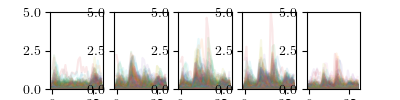

(0, 5)

In [12]:
plt.figure(figsize=(4,1))
mn = 0
mx = 5
plt.subplot(1,5,1)
plt.plot(s[:,paramdict['ctrl']].mean(1).T,alpha=0.1)
plt.ylim(mn,mx)
plt.subplot(1,5,2)
plt.plot(s[:,paramdict['fig']].mean(1).T,alpha=0.1)
plt.ylim(mn,mx)
plt.subplot(1,5,3)
plt.plot(s[:,paramdict['grnd']].mean(1).T,alpha=0.1)
plt.ylim(mn,mx)
plt.subplot(1,5,4)
plt.plot(s[:,paramdict['cross']].mean(1).T,alpha=0.1)
plt.ylim(mn,mx)
plt.subplot(1,5,5)
plt.plot(sSC[:,np.logical_and(stimParamsSC[1]==60,stimParamsSC[4]==1)].mean(1).T,alpha=0.1)
plt.ylim(mn,mx)

<IPython.core.display.Javascript object>


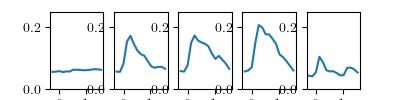

(0, 0.25)

In [13]:
plt.figure(figsize=(4,1))
mn = 0
mx = 0.25
alpha = 1
rg = np.arange(6,31-10)
t = (rg-8)/7.75
plt.subplot(1,5,1)
plt.plot(t,s[:,paramdict['ctrl']].mean(1).mean(0)[rg],alpha=alpha)
plt.ylim(mn,mx)
plt.subplot(1,5,2)
plt.plot(t,s[:,paramdict['fig']].mean(1).mean(0)[rg],alpha=alpha)
plt.ylim(mn,mx)
plt.subplot(1,5,3)
plt.plot(t,s[:,paramdict['grnd']].mean(1).mean(0)[rg],alpha=alpha)
plt.ylim(mn,mx)
plt.subplot(1,5,4)
plt.plot(t,s[:,paramdict['cross']].mean(1).mean(0)[rg],alpha=alpha)
plt.ylim(mn,mx)
plt.subplot(1,5,5)
plt.plot(t,sSC[:,np.logical_and(stimParamsSC[1]==60,stimParamsSC[4]==1)].mean(1).mean(0)[rg],alpha=alpha)
plt.ylim(mn,mx)

In [105]:
s.shape

(1116, 160, 31)

<IPython.core.display.Javascript object>


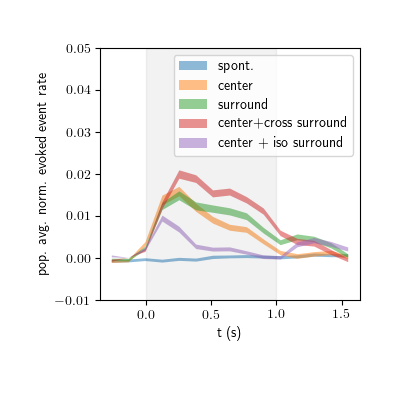

In [14]:
plt.figure(figsize=(4,4))
mn = -0.01
mx = 0.05
alpha = 0.5
rg = np.arange(6,31-10)
t = (rg-8)/7.75
# plt.subplot(1,5,1)
snorm = s/s.max(1).max(1)[:,np.newaxis,np.newaxis]
snormSC = sSC/s.max(1).max(1)[:,np.newaxis,np.newaxis]
bl = snorm[:,paramdict['cross']].mean(1)[:,7:8]
lb,ub = ut.bootstrap(snorm[:,paramdict['ctrl']].mean(1)[:,rg]-bl,np.mean,axis=0,pct=(16,84),nreps=int(1e3))
plt.fill_between(t,lb,ub,alpha=alpha)
plt.ylim(mn,mx)
# plt.subplot(1,5,2)
bl = snorm[:,paramdict['cross']].mean(1)[:,7:8]
lb,ub = ut.bootstrap(snorm[:,paramdict['fig']].mean(1)[:,rg]-bl,np.mean,axis=0,pct=(16,84),nreps=int(1e3))
plt.fill_between(t,lb,ub,alpha=alpha)
plt.ylim(mn,mx)
# plt.subplot(1,5,3)
bl = snorm[:,paramdict['cross']].mean(1)[:,7:8]
lb,ub = ut.bootstrap(snorm[:,paramdict['grnd']].mean(1)[:,rg]-bl,np.mean,axis=0,pct=(16,84),nreps=int(1e3))
plt.fill_between(t,lb,ub,alpha=alpha)
plt.ylim(mn,mx)
# plt.subplot(1,5,4)
bl = snorm[:,paramdict['cross']].mean(1)[:,7:8]
lb,ub = ut.bootstrap(snorm[:,paramdict['cross']].mean(1)[:,rg]-bl,np.mean,axis=0,pct=(16,84),nreps=int(1e3))
plt.fill_between(t,lb,ub,alpha=alpha)
plt.ylim(mn,mx)
# plt.subplot(1,5,5)
bl = snormSC[:,np.logical_and(stimParamsSC[1]==60,stimParamsSC[4]==1)].mean(1)[:,7:8]
lb,ub = ut.bootstrap(snormSC[:,np.logical_and(stimParamsSC[1]==60,stimParamsSC[4]==1)].mean(1)[:,rg]-bl,np.mean,axis=0,pct=(16,84),nreps=int(1e3))
plt.fill_between(t,lb,ub,alpha=alpha)
plt.fill_between((0,1),(-0.01,-0.01),(0.05,0.05),color='k',alpha=0.05)
plt.ylim(mn,mx)
plt.legend(['spont.','center','surround','center+cross surround','center + iso surround'])
plt.xlabel('t (s)')
plt.ylabel('pop. avg. norm. evoked event rate')
plt.gcf().subplots_adjust(bottom=0.25,left=0.25)

In [15]:
snorm[i,np.logical_and(paramdict['fig'],ori==0)].shape

(5, 31)

In [16]:
sresp[:,1,:,:,8:-15].shape

(1116, 8, 5, 8)

In [17]:
fig_trials = sresp[:,1,:,:,8:-15].mean(-1)
grnd_trials = sresp[:,2,:,:,8:-15].mean(-1)
ctrl_trials = sresp[:,0,:,:,8:-15].mean(-1).reshape((sresp.shape[0],-1))
fig_responsive = (fig_trials.mean(2)-1*fig_trials.std(2)/np.sqrt(fig_trials.shape[2])).max(1)>(ctrl_trials.mean(1)+1*ctrl_trials.std(1)/np.sqrt(ctrl_trials.shape[1]))
grnd_responsive = (grnd_trials.mean(2)-1*grnd_trials.std(2)/np.sqrt(grnd_trials.shape[2])).max(1)>(ctrl_trials.mean(1)+1*ctrl_trials.std(1)/np.sqrt(ctrl_trials.shape[1]))
lkat = np.logical_and(fig_responsive,~grnd_responsive)
# grnd_responsive = (grnd_trials.mean(1)-0.25*grnd_trials.std(1)/np.sqrt(5))>(ctrl_trials.mean(1)+0.25*ctrl_trials.std(1)/np.sqrt(5))
# lkat = np.logical_and(fig_responsive,~grnd_responsive)

In [18]:
lkat.sum()

148

In [19]:
sfig = np.zeros((snorm.shape[0],nori,5,snorm[:,:,8:-15].shape[-1]))
sctrl = np.zeros((snorm.shape[0],nori,5,snorm[:,:,8:-15].shape[-1]))
siso = np.zeros((snorm.shape[0],nori,5,snorm[:,:,8:-15].shape[-1]))
scross = np.zeros((snorm.shape[0],nori,5,snorm[:,:,8:-15].shape[-1]))
sgrnd = np.zeros((snorm.shape[0],nori,5,snorm[:,:,8:-15].shape[-1]))
for i,angle in enumerate(orilist):
    sfig[:,i] = snorm[:,np.logical_and(paramdict['fig'],ori==angle),8:-15]
    sctrl[:,i] = snorm[:,np.logical_and(paramdict['ctrl'],ori==angle),8:-15]
    scross[:,i] = snorm[:,np.logical_and(paramdict['cross'],ori==angle),8:-15]
    sgrnd[:,i] = snorm[:,np.logical_and(paramdict['grnd'],ori==angle),8:-15]
    siso[:,i] = snormSC[:,np.logical_and(np.logical_and(stimParamsSC[1]==60,stimParamsSC[4]==1),stimParamsSC[0]==angle),8:-15]

In [28]:
siso.shape

(1116, 8, 5, 8)

<IPython.core.display.Javascript object>


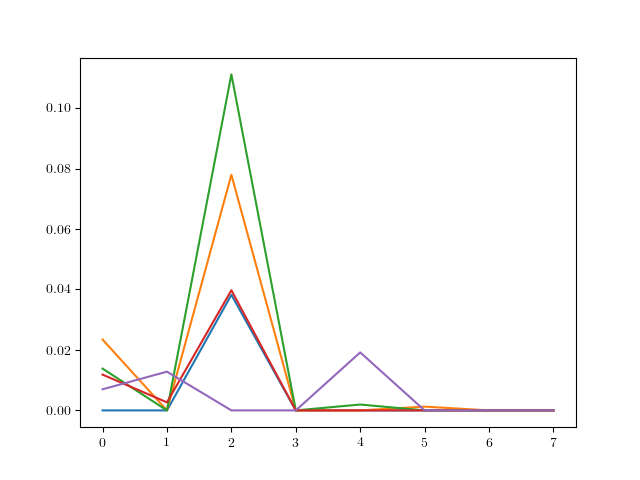

In [31]:
plt.figure()
plt.plot(sfig[lkat][0].mean(-1))

<IPython.core.display.Javascript object>


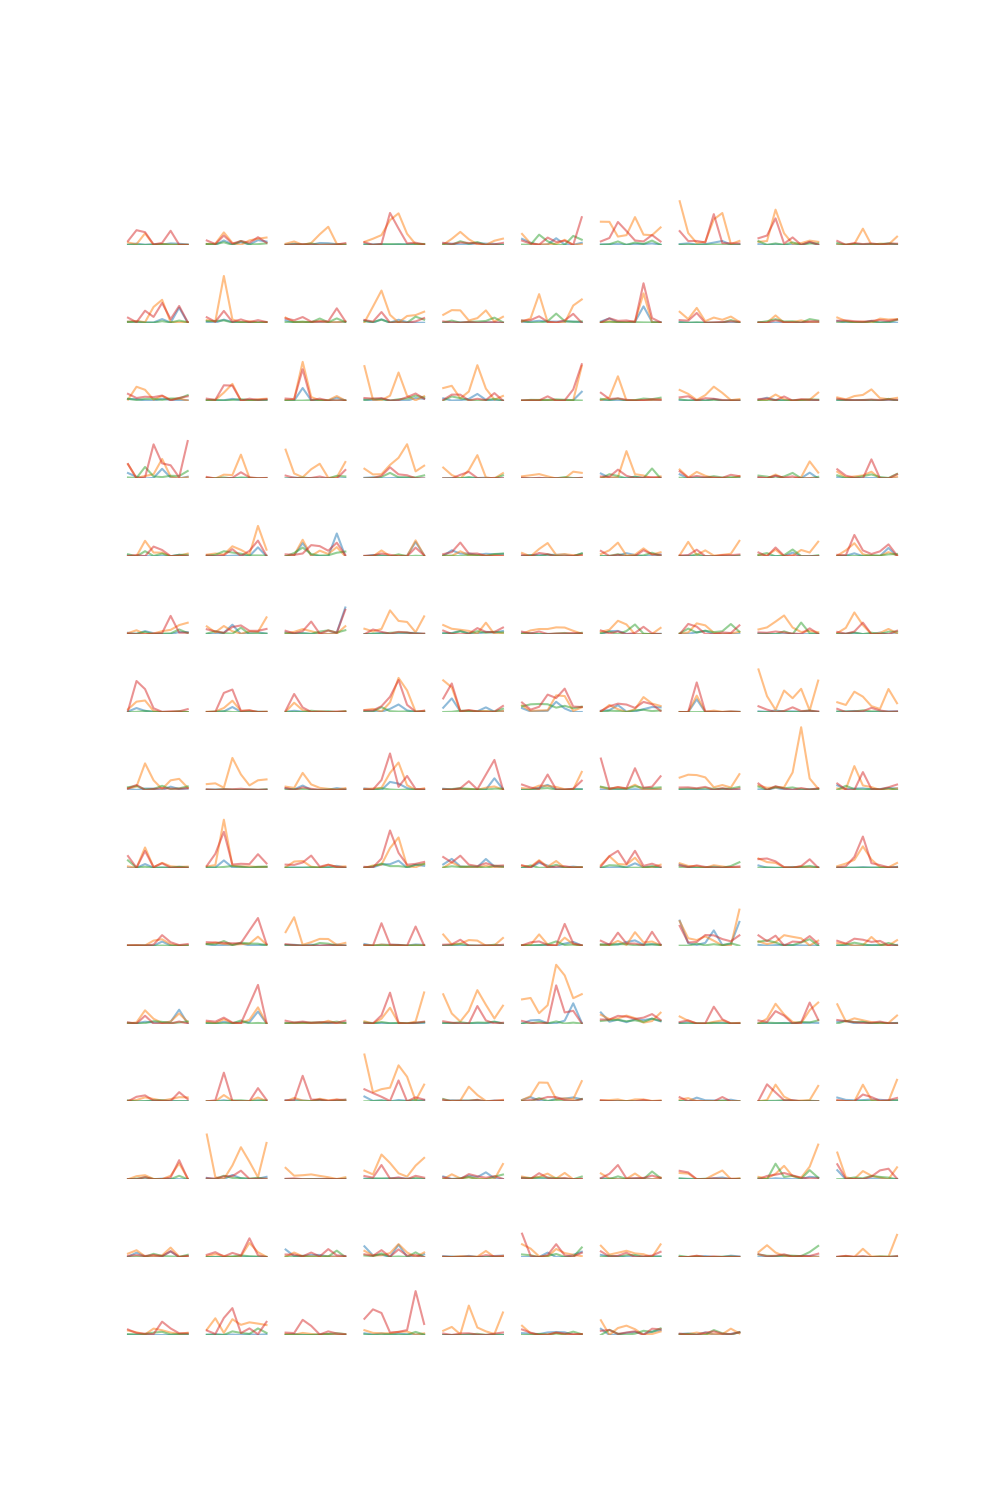

In [20]:
# plt.figure(figsize=(10,10)) #figsize=(15,15))
plt.figure(figsize=(10,15))
lkat = np.logical_and(fig_responsive,~grnd_responsive)
for i in range(lkat.sum()):
    plt.subplot(15,10,i+1)
    plt.plot(siso[lkat][i].mean(1).mean(-1),alpha=0.5)
    plt.plot(sfig[lkat][i].mean(1).mean(-1),alpha=0.5)
    plt.plot(sgrnd[lkat][i].mean(1).mean(-1),alpha=0.5)
    plt.plot(scross[lkat][i].mean(1).mean(-1),alpha=0.5)
    plt.ylim((0,0.3))
    plt.axis('off')

In [199]:
lb,ub = ut.bootstrap(sfig[lkat][thisind].mean(-1),np.mean,axis=1,pct=(16,84))

In [221]:
def gen_yerr(arr,axis=0,pct=(16,84)):
    lb,ub = ut.bootstrap(arr,np.mean,axis=axis,pct=pct)
    mn,_ = ut.bootstrap(arr,np.mean,axis=axis,pct=(50,50))
    return mn,np.concatenate((ub[np.newaxis]-mn[np.newaxis],mn[np.newaxis]-lb[np.newaxis]),axis=0)

In [211]:
lb,ub = ut.bootstrap(sfig[lkat][thisind].mean(-1),np.mean,axis=1,pct=(16,84))

<IPython.core.display.Javascript object>


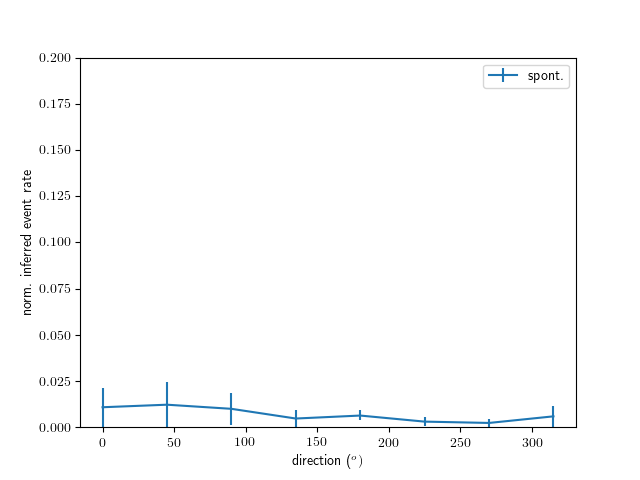

<IPython.core.display.Javascript object>


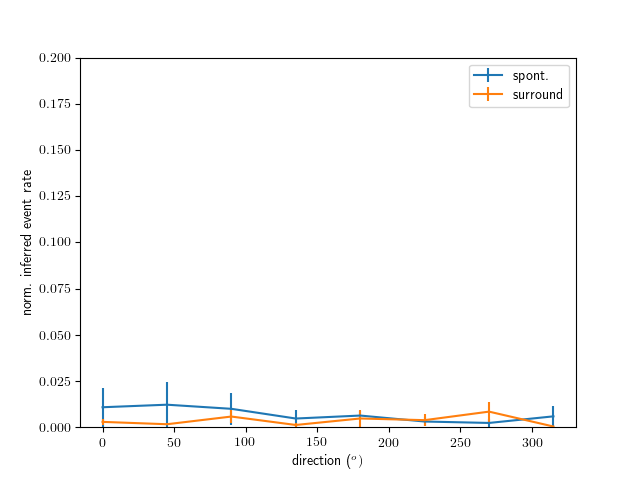

<IPython.core.display.Javascript object>


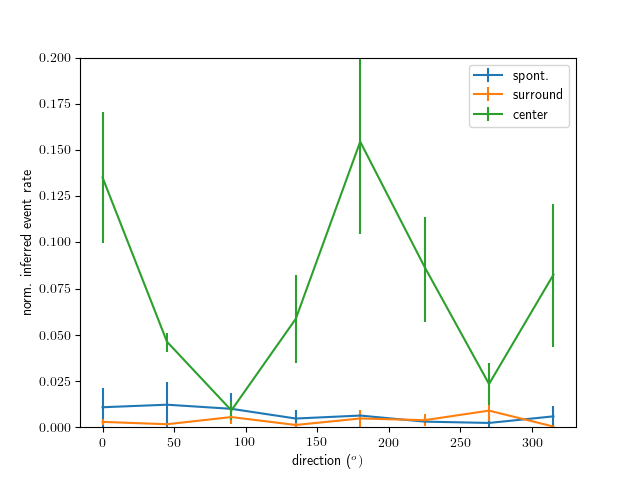

<IPython.core.display.Javascript object>


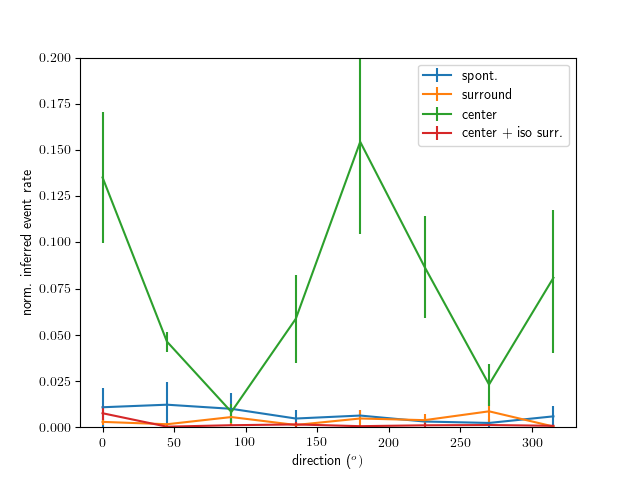

<IPython.core.display.Javascript object>


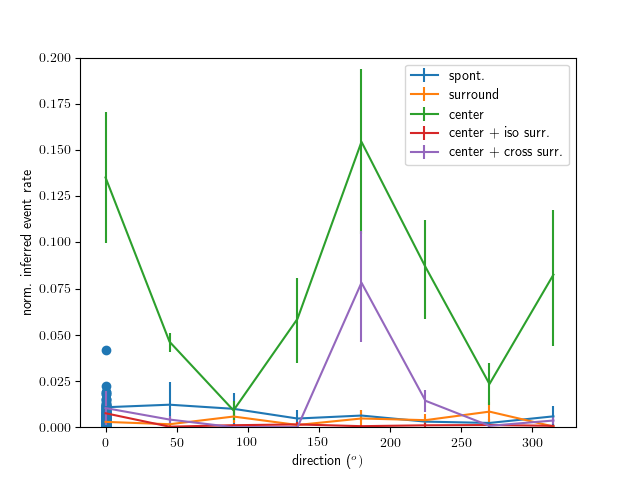

In [247]:
# plt.figure(figsize=(10,10)) #figsize=(15,15))
alpha = 1
for i in range(5):
    plt.figure() #figsize=(10,15))
#     thisind = 32
# for i in range(lkat.sum()):
#     plt.subplot(15,10,i+1)
    thisind = 104
    mn,yerr = gen_yerr(sctrl[lkat][thisind].mean(-1),axis=1)
    plt.errorbar(orilist,mn,yerr,alpha=alpha)
    if i>=1:
        mn,yerr = gen_yerr(sgrnd[lkat][thisind].mean(-1),axis=1)
        plt.errorbar(orilist,mn,yerr,alpha=alpha)
    if i>=2:
        mn,yerr = gen_yerr(sfig[lkat][thisind].mean(-1),axis=1)
        plt.errorbar(orilist,mn,yerr,alpha=alpha)
    if i>=3:
        mn,yerr = gen_yerr(siso[lkat][thisind].mean(-1),axis=1)
        plt.errorbar(orilist,np.concatenate((mn[-2:],mn[:-2])),np.concatenate((yerr[:,-2:],yerr[:,:-2]),axis=1),alpha=alpha)    
    if i>=4:
        mn,yerr = gen_yerr(scross[lkat][thisind].mean(-1),axis=1)
        plt.errorbar(orilist,mn,yerr,alpha=alpha)
    plt.legend(['spont.','surround','center','center + iso surr.','center + cross surr.'],loc='upper right')
    plt.xlabel(r'direction (^o)')
    plt.ylabel('norm. inferred event rate')
    plt.ylim((0,0.2))
    pylab.savefig('/home/mossing/excitation/thesis_mtg_18/figureground'+str(i)+'.png')
#     plt.axis('off')

<IPython.core.display.Javascript object>


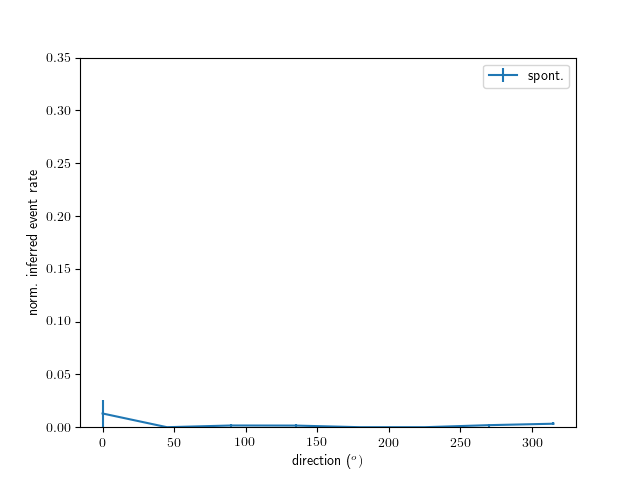

<IPython.core.display.Javascript object>


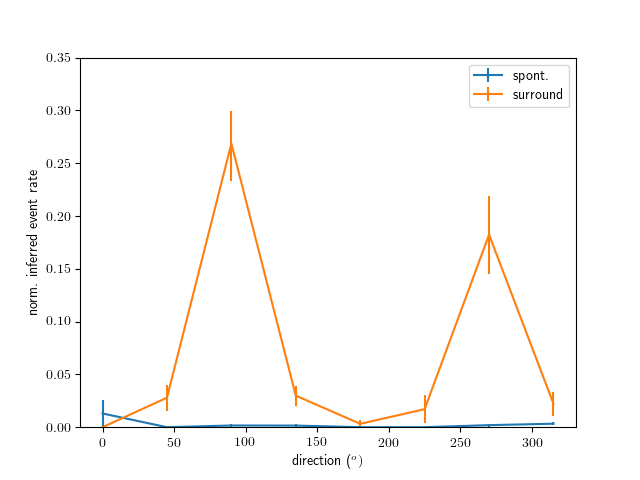

<IPython.core.display.Javascript object>


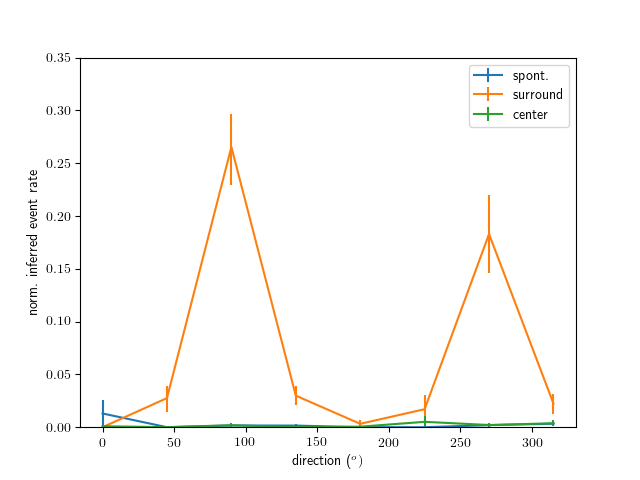

<IPython.core.display.Javascript object>


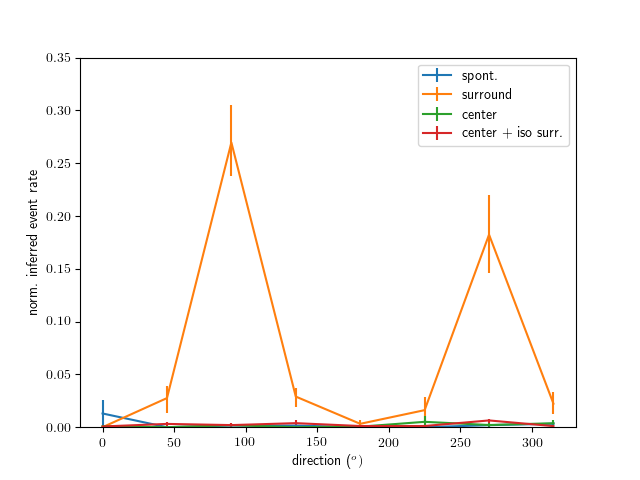

<IPython.core.display.Javascript object>


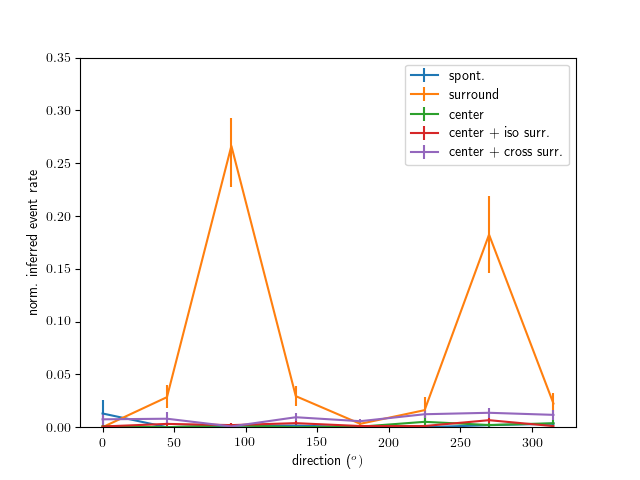

In [282]:
# plt.figure(figsize=(10,10)) #figsize=(15,15))
alpha = 1
for i in range(5):
    plt.figure() #figsize=(10,15))
#     thisind = 32
# for i in range(lkat.sum()):
#     plt.subplot(15,10,i+1)
    thisind = 90
    mn,yerr = gen_yerr(sctrl[lkat][thisind].mean(-1),axis=1)
    plt.errorbar(orilist,mn,yerr,alpha=alpha)
    if i>=1:
        mn,yerr = gen_yerr(sgrnd[lkat][thisind].mean(-1),axis=1)
        plt.errorbar(orilist,mn,yerr,alpha=alpha)
    if i>=2:
        mn,yerr = gen_yerr(sfig[lkat][thisind].mean(-1),axis=1)
        plt.errorbar(orilist,mn,yerr,alpha=alpha)
    if i>=3:
        mn,yerr = gen_yerr(siso[lkat][thisind].mean(-1),axis=1)
        plt.errorbar(orilist,np.concatenate((mn[2:],mn[:2])),np.concatenate((yerr[:,2:],yerr[:,:2]),axis=1),alpha=alpha)    
    if i>=4:
        mn,yerr = gen_yerr(scross[lkat][thisind].mean(-1),axis=1)
        plt.errorbar(orilist,mn,yerr,alpha=alpha)
    #
    plt.legend(['spont.','surround','center','center + iso surr.','center + cross surr.'],loc='upper right')
    plt.xlabel(r'direction (^o)')
    plt.ylabel('norm. inferred event rate')
    plt.ylim((0,0.35))
    pylab.savefig('/home/mossing/excitation/thesis_mtg_18/figureground_surround_center_suppressed'+str(i)+'.png')

<IPython.core.display.Javascript object>


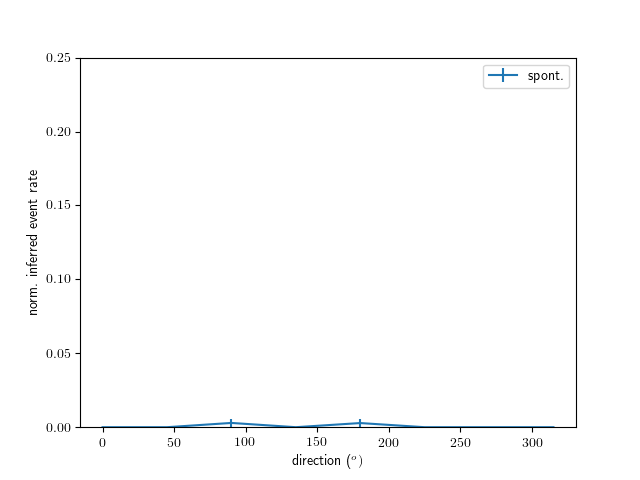

<IPython.core.display.Javascript object>


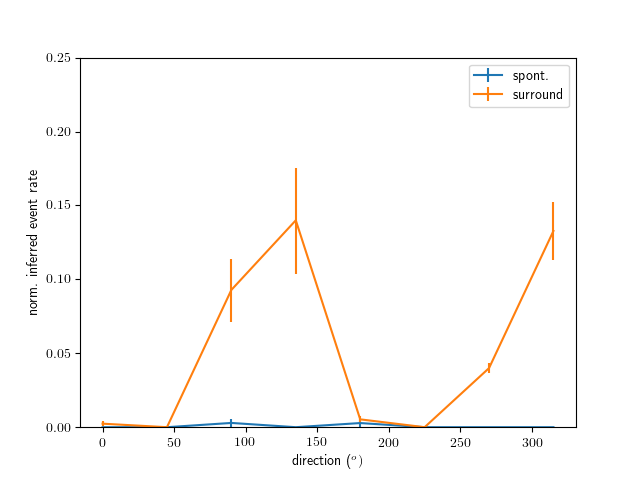

<IPython.core.display.Javascript object>


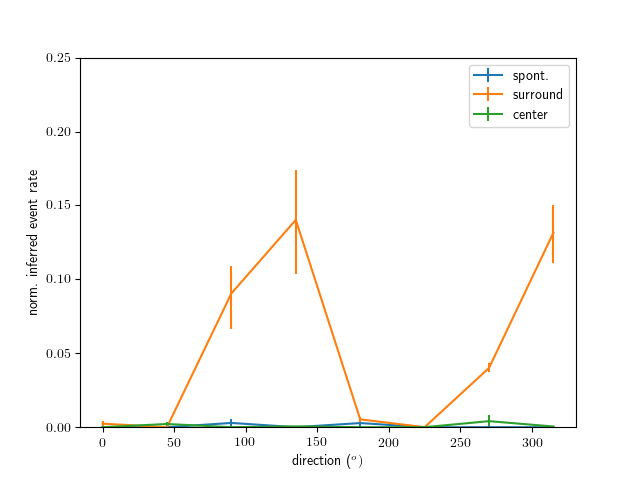

<IPython.core.display.Javascript object>


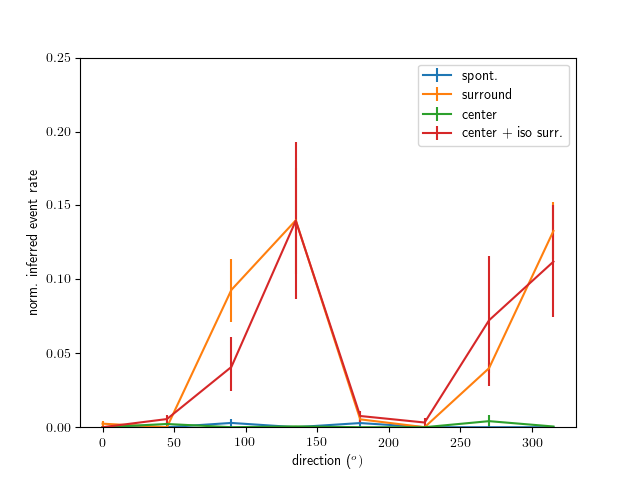

<IPython.core.display.Javascript object>


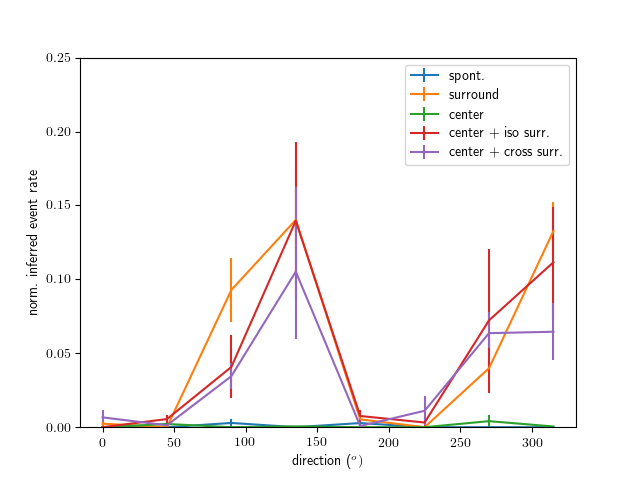

In [284]:
# plt.figure(figsize=(10,10)) #figsize=(15,15))
alpha = 1
for i in range(5):
    plt.figure() #figsize=(10,15))
#     thisind = 32
# for i in range(lkat.sum()):
#     plt.subplot(15,10,i+1)
    thisind = 26
    mn,yerr = gen_yerr(sctrl[lkat][thisind].mean(-1),axis=1)
    plt.errorbar(orilist,mn,yerr,alpha=alpha)
    if i>=1:
        mn,yerr = gen_yerr(sgrnd[lkat][thisind].mean(-1),axis=1)
        plt.errorbar(orilist,mn,yerr,alpha=alpha)
    if i>=2:
        mn,yerr = gen_yerr(sfig[lkat][thisind].mean(-1),axis=1)
        plt.errorbar(orilist,mn,yerr,alpha=alpha)
    if i>=3:
        mn,yerr = gen_yerr(siso[lkat][thisind].mean(-1),axis=1)
        plt.errorbar(orilist,np.concatenate((mn[2:],mn[:2])),np.concatenate((yerr[:,2:],yerr[:,:2]),axis=1),alpha=alpha)    
    if i>=4:
        mn,yerr = gen_yerr(scross[lkat][thisind].mean(-1),axis=1)
        plt.errorbar(orilist,mn,yerr,alpha=alpha)
    #
    plt.legend(['spont.','surround','center','center + iso surr.','center + cross surr.'],loc='upper right')
    plt.xlabel(r'direction (^o)')
    plt.ylabel('norm. inferred event rate')
    plt.ylim((0,0.25))
    pylab.savefig('/home/mossing/excitation/thesis_mtg_18/figureground_surround_non_suppressed'+str(i)+'.png')

<IPython.core.display.Javascript object>


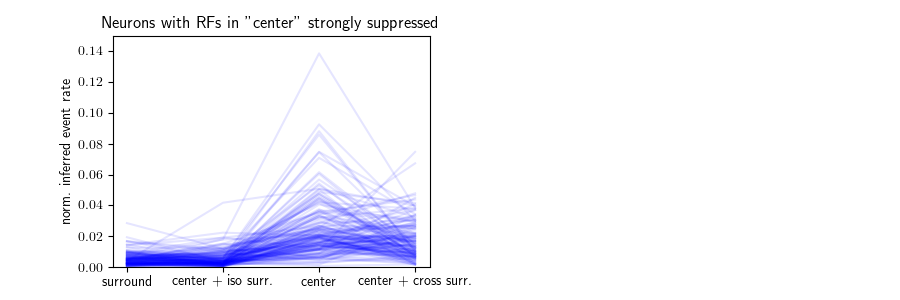

<IPython.core.display.Javascript object>


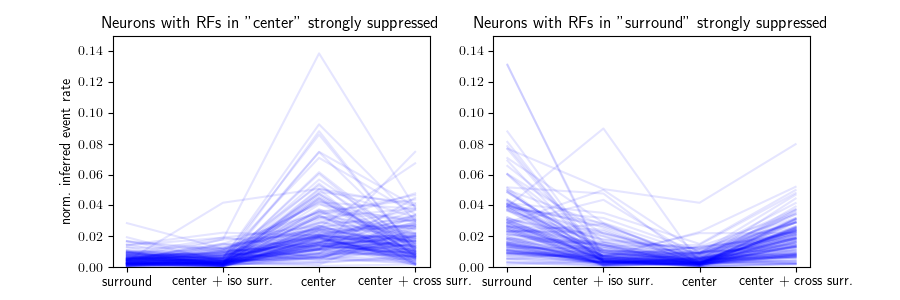

In [275]:
plt.figure(figsize=(9,3))
bd = (0,0.15)

plt.subplot(1,2,1)
plt.title('Neurons with RFs in "center" strongly suppressed')
lkat = np.logical_and(fig_responsive,~grnd_responsive)
mfig = sfig[lkat].mean(-1).mean(-1).mean(-1)[np.newaxis]
miso = siso[lkat].mean(-1).mean(-1).mean(-1)[np.newaxis]
mcross = scross[lkat].mean(-1).mean(-1).mean(-1)[np.newaxis]
mgrnd = sgrnd[lkat].mean(-1).mean(-1).mean(-1)[np.newaxis]
plt.plot(np.concatenate((mgrnd,miso,mfig,mcross)),c='b',alpha=0.1)
plt.xticks((0,1,2,3),('surround','center + iso surr.','center','center + cross surr.'))
plt.ylabel('norm. inferred event rate')
plt.ylim(bd)
pylab.savefig('/home/mossing/excitation/thesis_mtg_18/figureground_summary.png')
# plt.gcf().subplots_adjust(bottom=0.25,left=0.25)

plt.figure(figsize=(9,3))

plt.subplot(1,2,1)
plt.title('Neurons with RFs in "center" strongly suppressed')
lkat = np.logical_and(fig_responsive,~grnd_responsive)
mfig = sfig[lkat].mean(-1).mean(-1).mean(-1)[np.newaxis]
miso = siso[lkat].mean(-1).mean(-1).mean(-1)[np.newaxis]
mcross = scross[lkat].mean(-1).mean(-1).mean(-1)[np.newaxis]
mgrnd = sgrnd[lkat].mean(-1).mean(-1).mean(-1)[np.newaxis]
plt.plot(np.concatenate((mgrnd,miso,mfig,mcross)),c='b',alpha=0.1)
plt.xticks((0,1,2,3),('surround','center + iso surr.','center','center + cross surr.'))
plt.ylabel('norm. inferred event rate')
plt.ylim(bd)
# plt.gcf().subplots_adjust(bottom=0.25,left=0.25)

plt.subplot(1,2,2)
plt.title('Neurons with RFs in "surround" strongly suppressed')
lkat = np.logical_and(~fig_responsive,grnd_responsive)
mfig = sfig[lkat].mean(-1).mean(-1).mean(-1)[np.newaxis]
miso = siso[lkat].mean(-1).mean(-1).mean(-1)[np.newaxis]
mcross = scross[lkat].mean(-1).mean(-1).mean(-1)[np.newaxis]
mgrnd = sgrnd[lkat].mean(-1).mean(-1).mean(-1)[np.newaxis]
plt.plot(np.concatenate((mgrnd,miso,mfig,mcross)),c='b',alpha=0.1)
plt.xticks((0,1,2,3),('surround','center + iso surr.','center','center + cross surr.'))
# plt.ylabel('norm. inferred event rate')
plt.ylim(bd)
pylab.savefig('/home/mossing/excitation/thesis_mtg_18/figureground_summary_surround.png')
# plt.gcf().subplots_adjust(bottom=0.25,left=0.25)

# plt.subplot(1,3,3)
# lkat = np.logical_and(fig_responsive,grnd_responsive)
# mfig = sfig[lkat].mean(-1).mean(-1).mean(-1)[np.newaxis]
# miso = siso[lkat].mean(-1).mean(-1).mean(-1)[np.newaxis]
# mcross = scross[lkat].mean(-1).mean(-1).mean(-1)[np.newaxis]
# mgrnd = sgrnd[lkat].mean(-1).mean(-1).mean(-1)[np.newaxis]
# plt.plot(np.concatenate((mgrnd,miso,mfig,mcross)),c='b',alpha=0.1)
# plt.xticks((0,1,2,3),('surround','center + iso surr.','center','center + cross surr.'))
# # plt.ylabel('norm. inferred event rate')
# plt.ylim(bd)

<IPython.core.display.Javascript object>


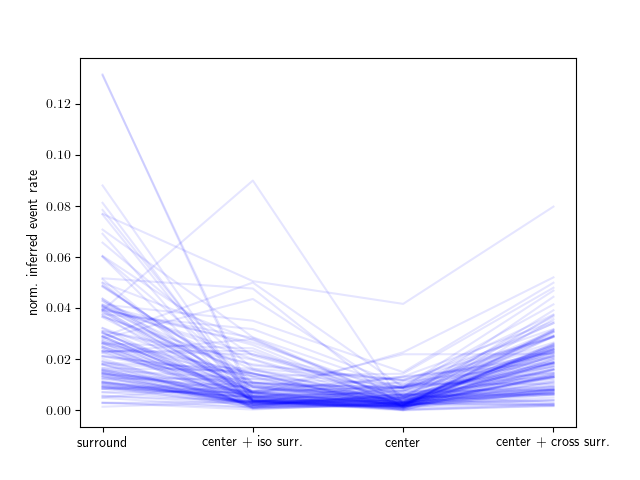

Text(0,0.5,'norm. inferred event rate')

In [264]:
lkat.sum()

134

<IPython.core.display.Javascript object>


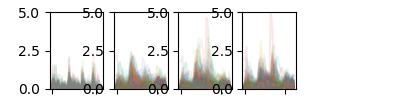

(0, 5)

In [57]:
plt.figure(figsize=(4,1))
mn = 0
mx = 5
plt.subplot(1,5,1)
plt.plot(sresp[:,0].mean(1).mean(1),alpha=0.1)
plt.ylim(mn,mx)
plt.subplot(1,5,2)
plt.plot(s[:,paramdict['fig']].mean(1).T,alpha=0.1)
plt.ylim(mn,mx)
plt.subplot(1,5,3)
plt.plot(s[:,paramdict['grnd']].mean(1).T,alpha=0.1)
plt.ylim(mn,mx)
plt.subplot(1,5,4)
plt.plot(s[:,paramdict['cross']].mean(1).T,alpha=0.1)
plt.ylim(mn,mx)

<IPython.core.display.Javascript object>


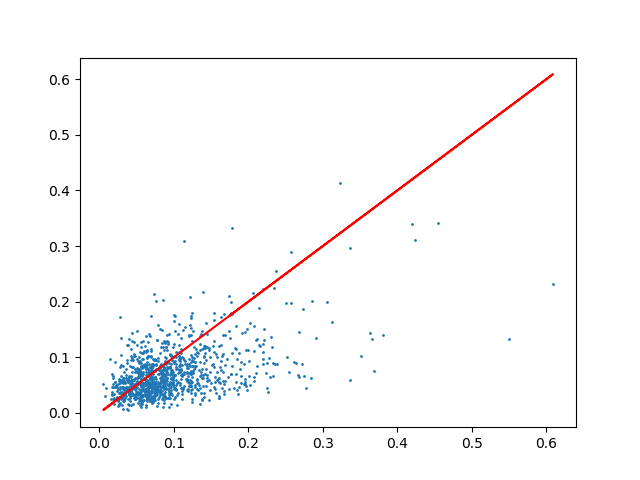

In [7]:
plt.scatter(s.reshape((s.shape[0],-1)).mean(1),sSC.reshape((s.shape[0],-1)).mean(1),s=1)
plt.plot(s.reshape((s.shape[0],-1)).mean(1),s.reshape((s.shape[0],-1)).mean(1),c='r')

<IPython.core.display.Javascript object>


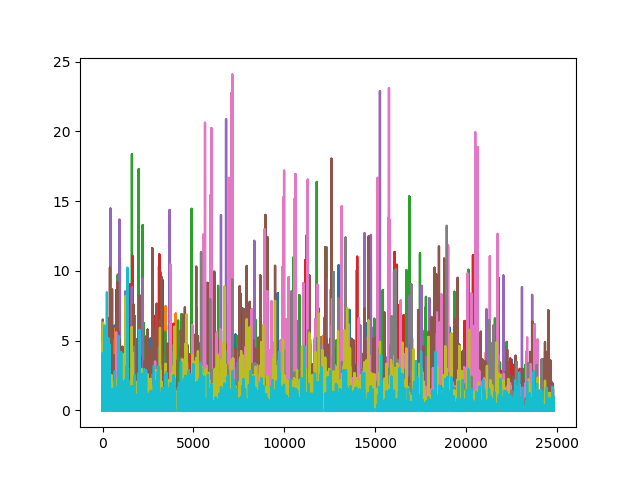

In [8]:
k = np.arange(10)
plt.plot(np.concatenate((s[k].reshape((s[k].shape[0],-1)),sSC[k].reshape((s[k].shape[0],-1))),axis=1).T)

In [6]:
# frame = matfile['frame']
# traces = matfile['traces']
# stimParams = matfile['stimParams']
# frame = matfile['frame']
# traces = matfile['corrected']
# stimParams = matfile['stimParams']
# stimlen = np.diff(frame.reshape((-1,2)),axis=1).min()

NameError: name 'frame' is not defined

In [7]:
def trialize(traces,frame,extra_before=8,extra_after=15):
    fr = frame.reshape((-1,2))
    stimlen = np.diff(fr,axis=1).min()
    ncell = traces.shape[0]
    ntrial = fr.shape[0]
    trialwise = np.zeros((ncell,ntrial,stimlen+extra_before+extra_after))
    for i in range(ntrial):
        trialwise[:,i] = traces[:,fr[i,0]-extra_before:fr[i,0]+stimlen+extra_after]
    return trialwise

In [9]:
# extra_before=8
# extra_after=15
# trialwise = trialize(traces,frame[1:-1],extra_before=extra_before,extra_after=extra_after)

In [10]:
# trialwiseSC = trialize(tracesSC,frameSC[1:-1],extra_before=extra_before,extra_after=extra_after)

NameError: name 'tracesSC' is not defined

In [11]:
def norm01(arr):
    return (arr-arr.min(1)[:,np.newaxis])/(arr.max(1)[:,np.newaxis]-arr.min(1)[:,np.newaxis])

In [25]:
stimParams[-1]

array([ 1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  1.,  1.,  1.])

In [8]:
(np.isnan(traces)).sum()

NameError: name 'traces' is not defined

In [16]:
def zscore(trialwise):
    arr = trialwise.reshape((trialwise.shape[0],trialwise.shape[1]*trialwise.shape[2]))
    arr = (arr-arr.mean(1)[:,np.newaxis])/arr.std(1)[:,np.newaxis]
    return arr.reshape(trialwise.shape)

In [17]:
zs = zscore(trialwise)
zsSC = zscore(trialwiseSC)

In [18]:
orilist = np.unique(ori)
nori = len(orilist)
# dimensions are cell X other fig/gd/etc. X orientation X rep no X time
resp = np.zeros((zs.shape[0],4,nori,5,zs.shape[-1]))
for i,name in enumerate(order):
    for j,angle in enumerate(orilist):
        resp[:,i,j,:,:] = zs[:,np.logical_and(ori==angle,paramdict[name]),:]

In [52]:
order

['ctrl', 'fig', 'grnd', 'cross', 'iso']

In [22]:
sresp[:,2].mean(1).mean(-1).shape

(1116, 5)

In [23]:
sresp[:,0].shape

(1116, 8, 5, 31)

In [26]:
sresp[fig_responsive][:10].shape

(10, 5, 8, 5, 31)

In [12]:
sresp[0].shape

(4, 8, 5, 31)

<IPython.core.display.Javascript object>


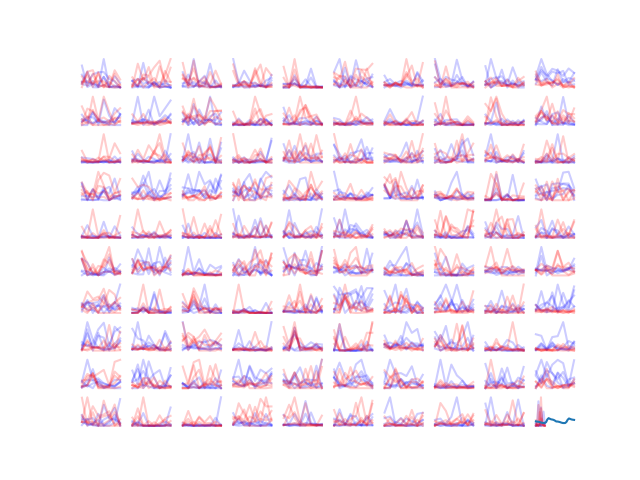

In [21]:
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.plot(sresp[i,0].mean(-1),c='b',alpha=0.2)
    plt.plot(sresp[i,1].mean(-1),c='r',alpha=0.2)
    plt.axis('off')

<IPython.core.display.Javascript object>


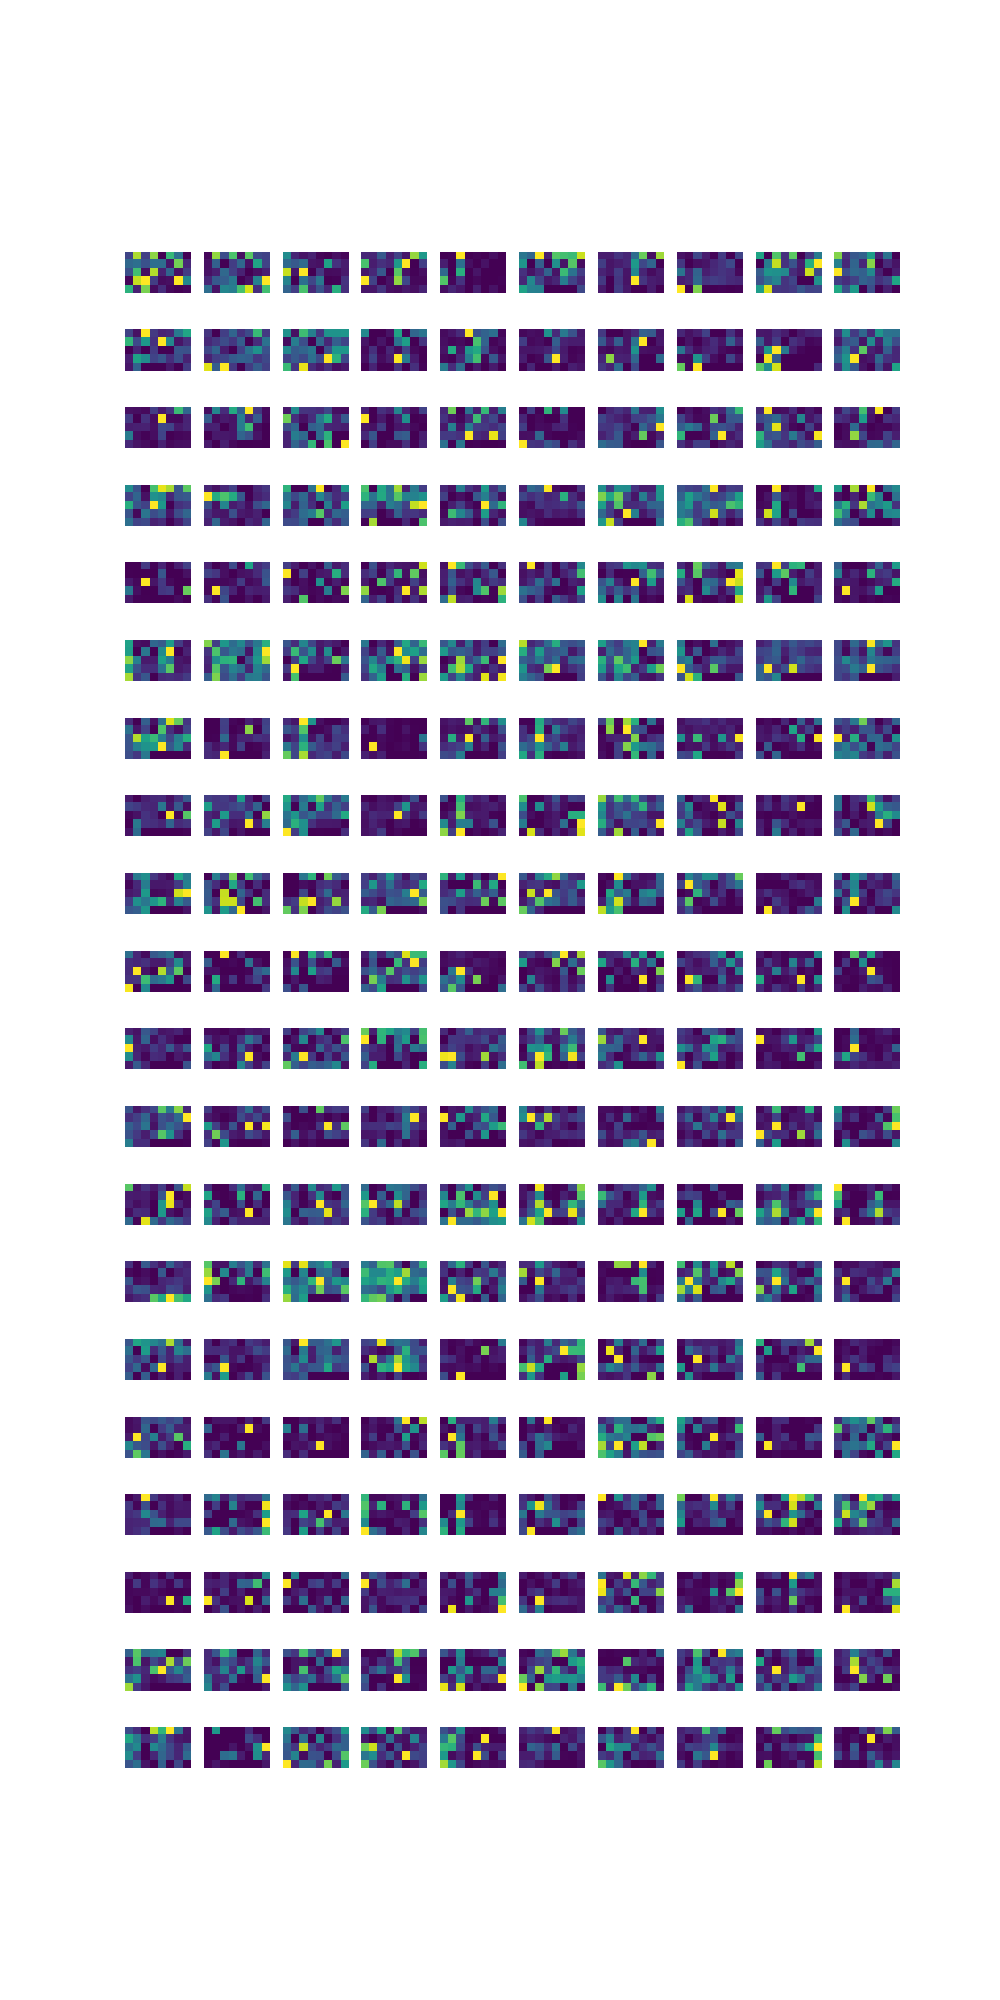

In [10]:
N = 200
plt.figure(figsize=(10,20))
for k in range(N):
    plt.subplot(20,10,k+1)
    plt.imshow(sresp[k,1].mean(-1).T)
    plt.axis('off')

<IPython.core.display.Javascript object>


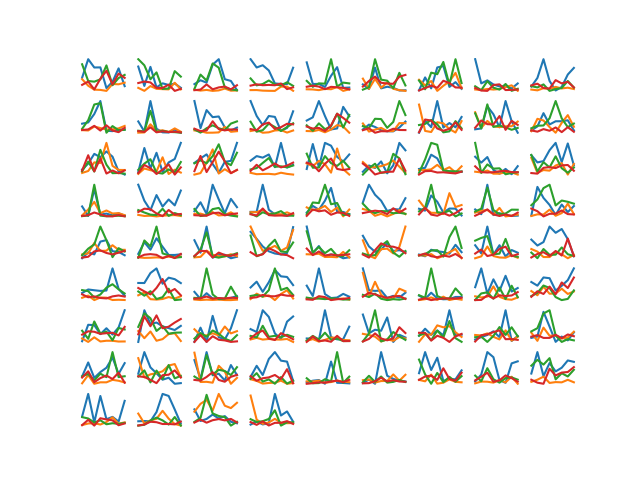

In [161]:
for i in range(lkat.sum()):
    plt.subplot(9,9,i+1)
    plt.plot(sresp[lkat][i,1].mean(1).mean(1))
    plt.plot(sresp[lkat][i,4].mean(1).mean(1))
    plt.plot(sresp[lkat][i,3].mean(1).mean(1))
    plt.plot(sresp[lkat][i,2].mean(1).mean(1))
    plt.axis('off')

In [93]:
grd_responsive.shape

NameError: name 'grd_responsive' is not defined

In [33]:
def print_multipage(t,arr,fn,filename):
    from matplotlib.backends.backend_pdf import PdfPages
    plt.close()
    with PdfPages(filename+'.pdf') as pdf:
        for i in range(arr.shape[0]):
            fn(t,arr[i])
            pdf.savefig()
            plt.close()

In [34]:
t = np.arange(-extra_before,stimlen+extra_after)/(15.5/2)

In [35]:
def fill_in_sem(t,arr,c='b'):
    mn = arr.mean(0)
    sem = arr.std(0)/np.sqrt(arr.shape[0])
    squiggle = plt.fill_between(t,mn-sem,mn+sem,facecolor=c,alpha=0.5)
    return squiggle

In [36]:
def plotZs(t,arr):
    for i in range(8):
        plt.subplot(3,4,i+1)
        ishift = np.remainder(i-2,8)
        squig_fig = fill_in_sem(t,arr[1,i],c='b')
        squig_ground = fill_in_sem(t,arr[2,ishift],c='g')
        squig_iso = fill_in_sem(t,arr[3,ishift],c='m')
        squig_cross = fill_in_sem(t,arr[4,i],c='c')
        plt.gca().get_xaxis().set_ticks([])
        plt.gca().get_yaxis().set_ticks([])
        plt.ylim((arr.mean(3).min()-arr.std(3).max(),arr.mean(3).max()+arr.std(3).max()))
    plt.subplot(3,4,12)
    plt.axis('off')
    plt.legend((squig_fig,squig_ground,squig_iso,squig_cross),('figure only','ground only','iso','cross'))

In [37]:
fig_responsive = (resp[:,1].mean(1).mean(1)-resp[:,1].mean(1).std(1)/np.sqrt(40)).max(1)>2*(resp[:,0].mean(1).mean(1)+resp[:,0].mean(1).std(1)/np.sqrt(40)).max(1)
grnd_responsive = (resp[:,2].mean(1).mean(1)-resp[:,2].mean(1).std(1)/np.sqrt(40)).max(1)>(resp[:,0].mean(1).mean(1)+resp[:,0].mean(1).std(1)/np.sqrt(40)).max(1)
lkat = np.logical_and(fig_responsive,~grnd_responsive)

In [38]:
resp[lkat].shape

(72, 4, 8, 5, 30)

In [39]:
order

['ctrl', 'fig', 'grnd', 'cross']

<IPython.core.display.Javascript object>


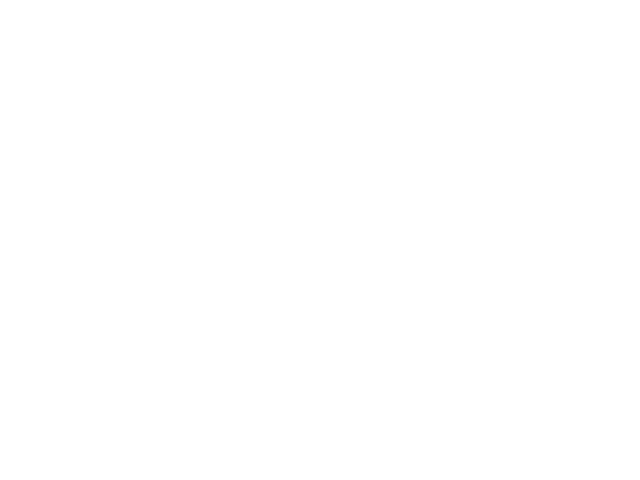

NameError: name 'lkat' is not defined

In [70]:
plt.figure() #figsize=(12,10))
for i in range(lkat.sum()):
    plt.subplot(8,9,i+1)
    plt.plot(resp[lkat][i,1,:,:,8:-15].mean(-1).mean(-1),alpha=0.3,c='b')
    plt.plot(resp[lkat][i,3,:,:,8:-15].mean(-1).mean(-1),alpha=0.3,c='m')
    plt.axis('off')
#     plt.plot(resp[lkat][i,4,:,:,8:-15].mean(-1).mean(-1),alpha=0.3,c='g')
#     plt.plot(resp[lkat][i,2,:,:,8:-15].mean(-1).mean(-1),alpha=0.3,c='k')

<IPython.core.display.Javascript object>


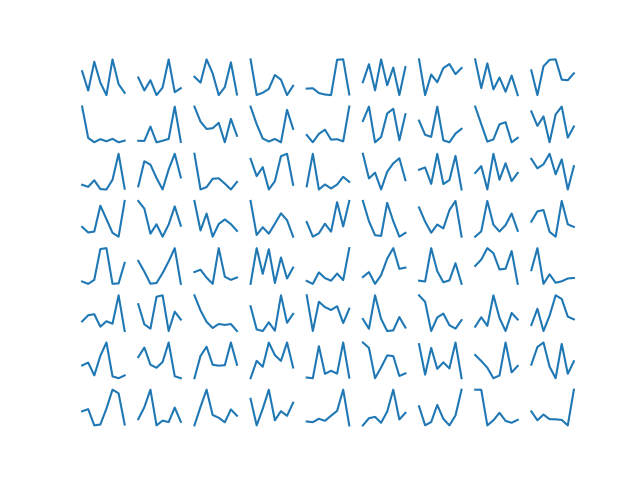

In [127]:
for i in range(lkat.sum()):
    plt.subplot(8,9,i+1)
    plt.plot(respSC[lkat][i].mean(-1).mean(-1))
    plt.axis('off')

<IPython.core.display.Javascript object>


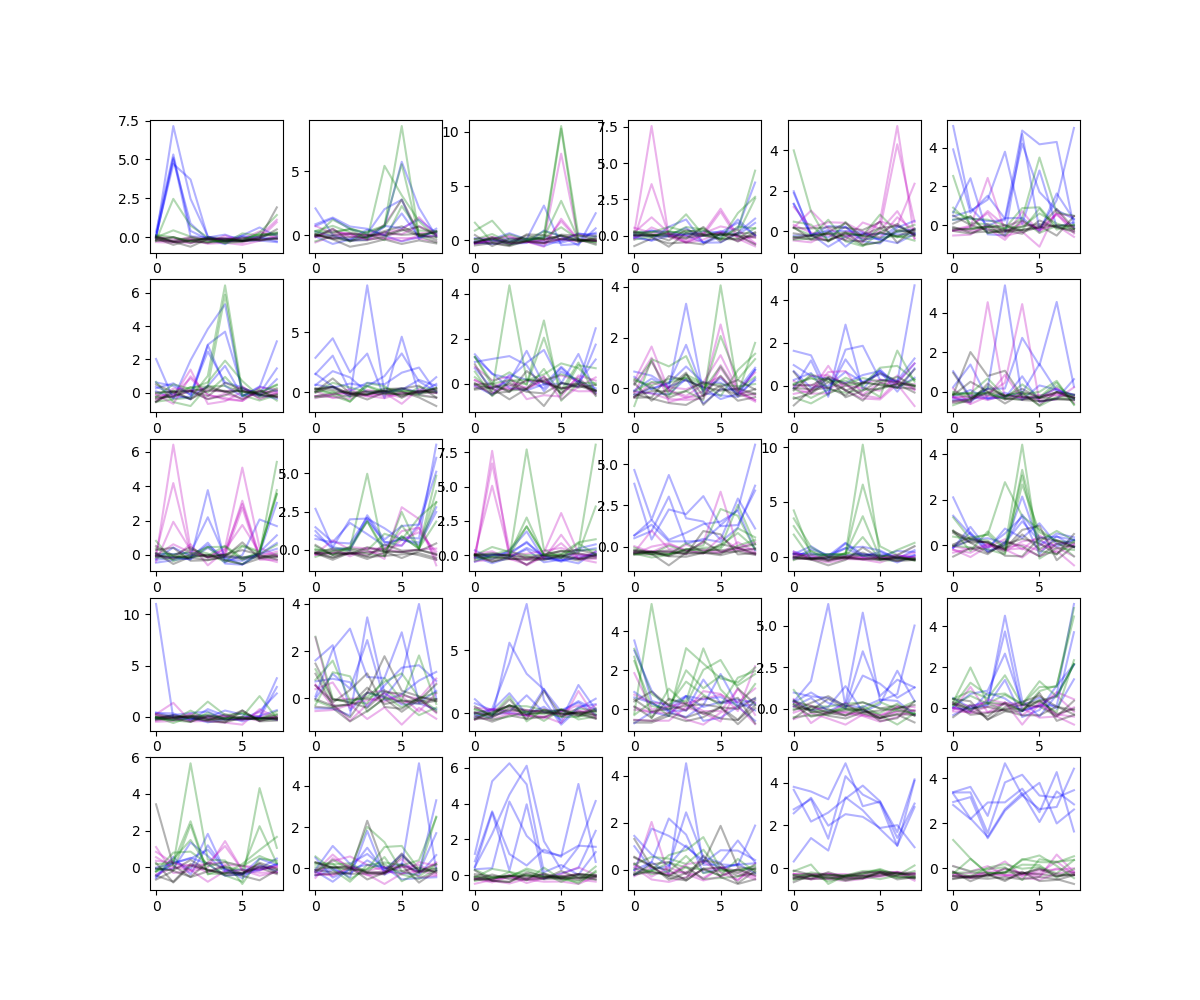

In [87]:
plt.figure(figsize=(12,10))
for i in range(lkat.sum()):
    plt.subplot(5,6,i+1)
    plt.plot(resp[lkat][i,1,:,:,8:-15].mean(-1),alpha=0.3,c='b')
    plt.plot(resp[lkat][i,3,:,:,8:-15].mean(-1),alpha=0.3,c='m')
    plt.plot(resp[lkat][i,4,:,:,8:-15].mean(-1),alpha=0.3,c='g')
    plt.plot(resp[lkat][i,2,:,:,8:-15].mean(-1),alpha=0.3,c='k')

<IPython.core.display.Javascript object>


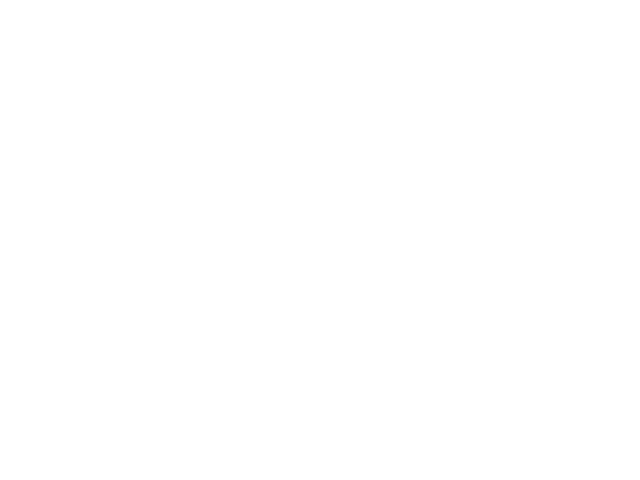

<IPython.core.display.Javascript object>


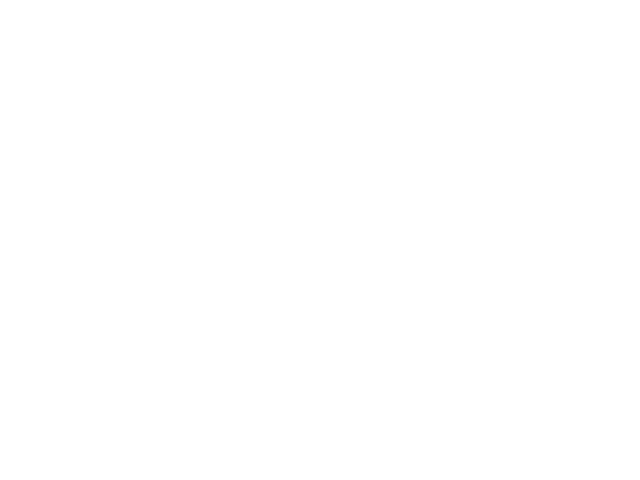

<IPython.core.display.Javascript object>


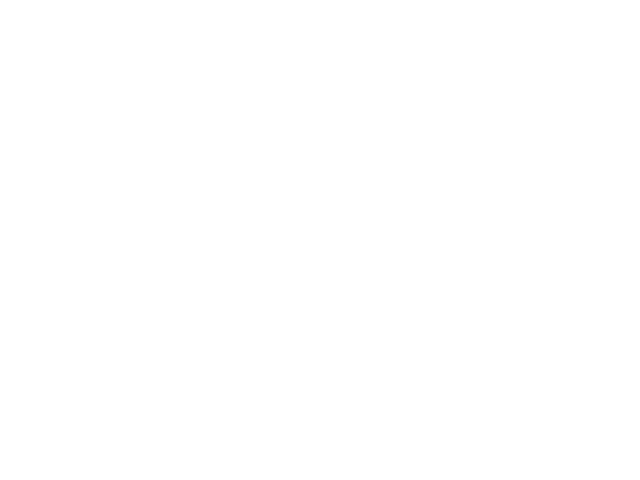

<IPython.core.display.Javascript object>


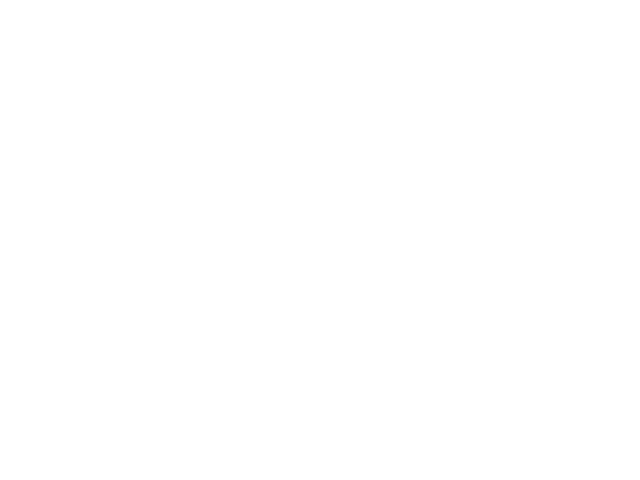

<IPython.core.display.Javascript object>


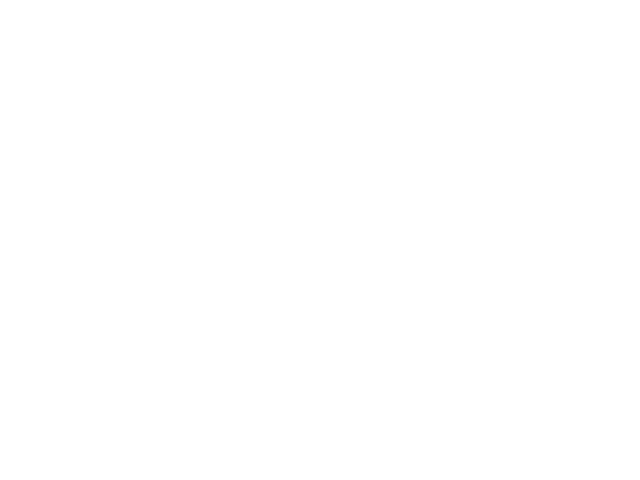

<IPython.core.display.Javascript object>


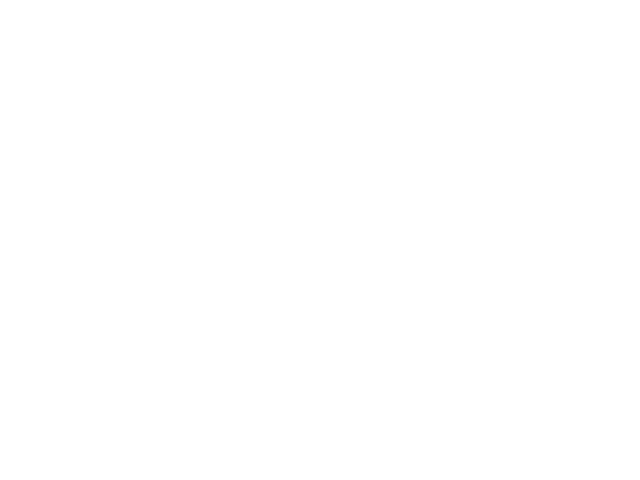

<IPython.core.display.Javascript object>


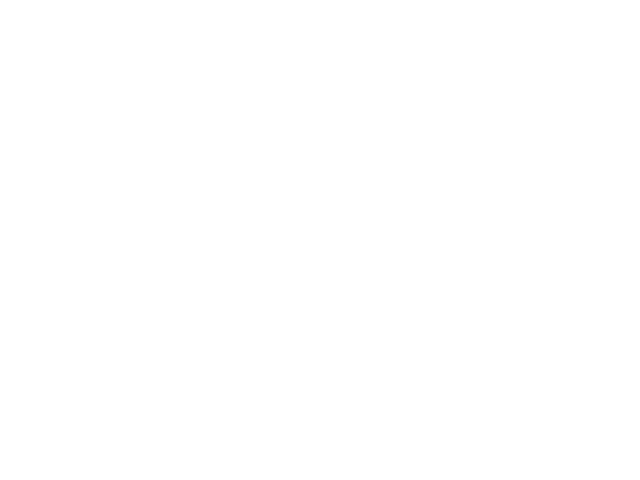

<IPython.core.display.Javascript object>


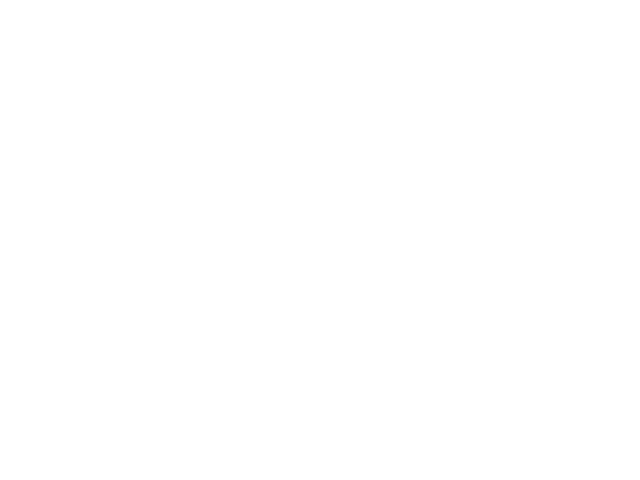

<IPython.core.display.Javascript object>


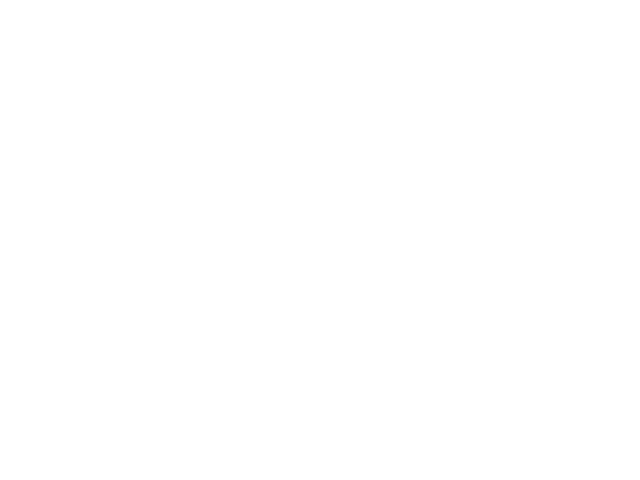

<IPython.core.display.Javascript object>


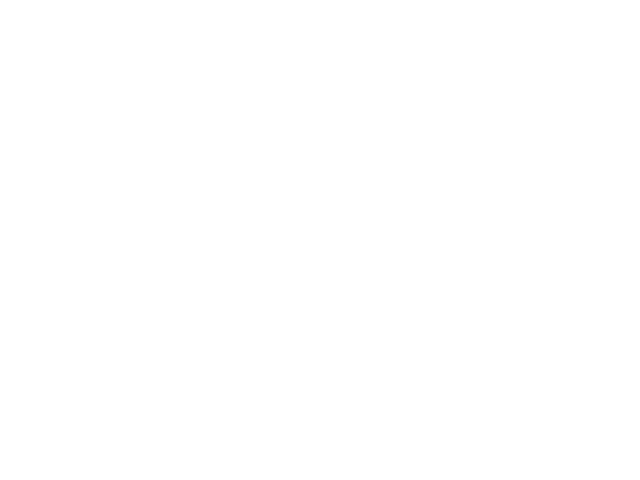

<IPython.core.display.Javascript object>


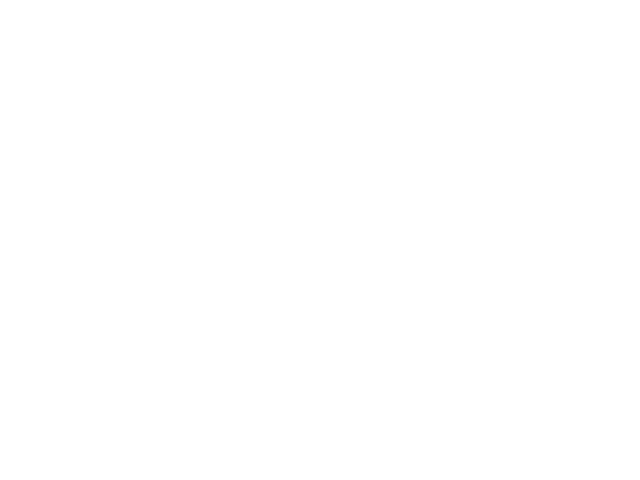

<IPython.core.display.Javascript object>


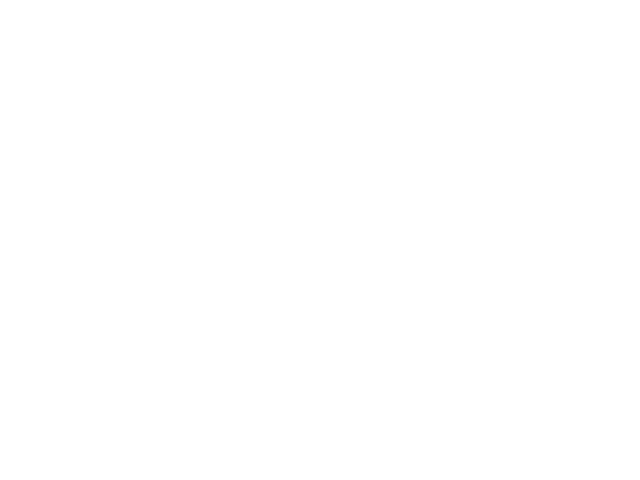

<IPython.core.display.Javascript object>


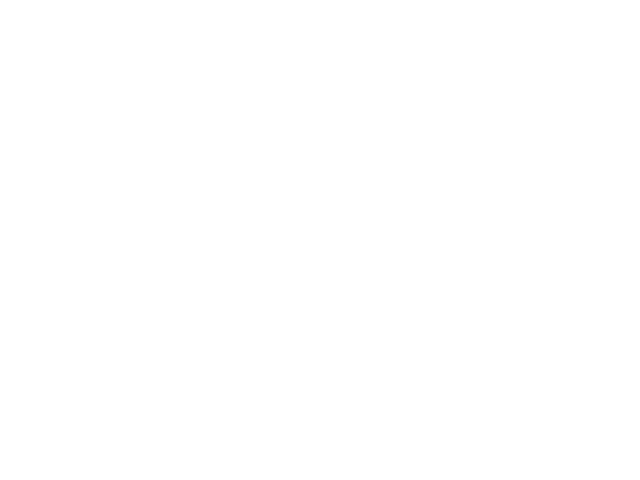

<IPython.core.display.Javascript object>


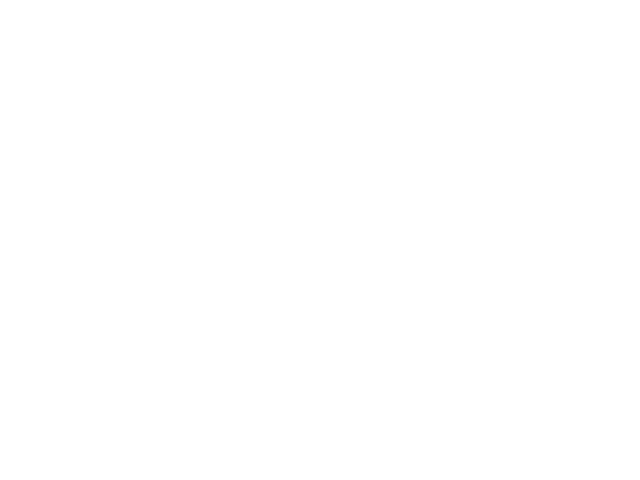

<IPython.core.display.Javascript object>


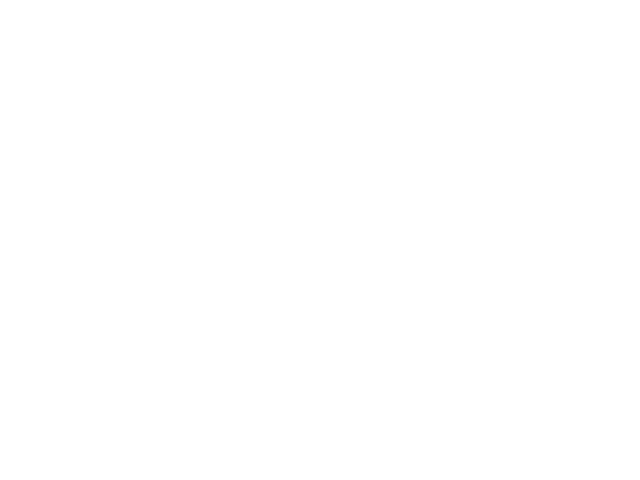

<IPython.core.display.Javascript object>


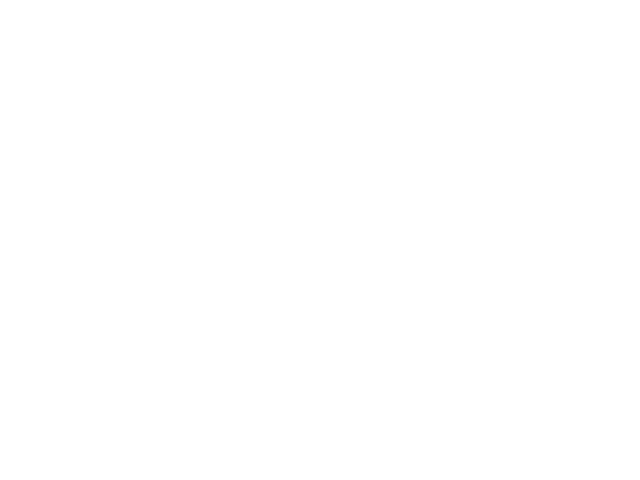

<IPython.core.display.Javascript object>


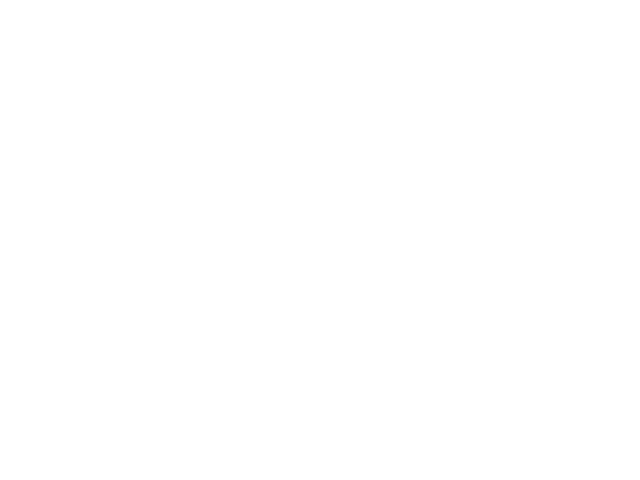

<IPython.core.display.Javascript object>


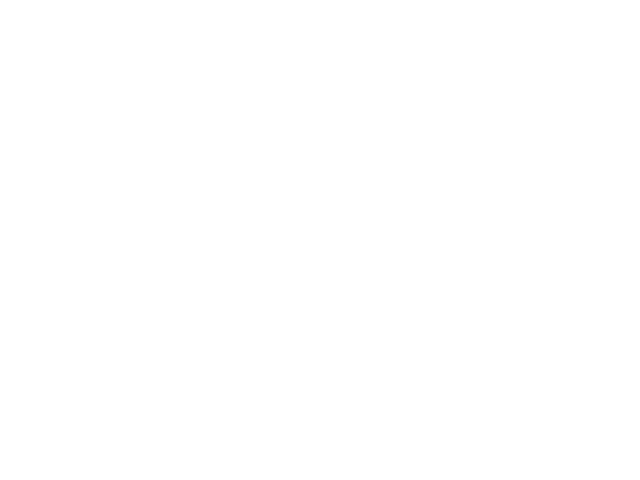

<IPython.core.display.Javascript object>


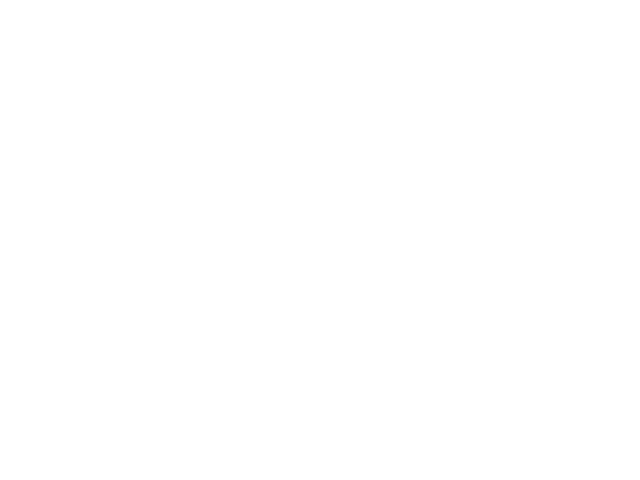

<IPython.core.display.Javascript object>


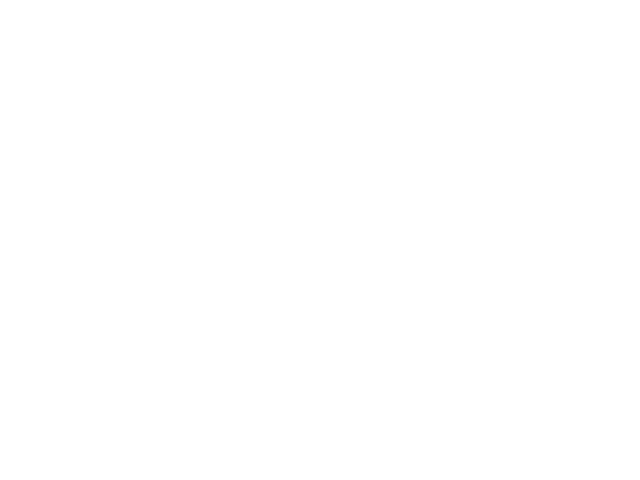

<IPython.core.display.Javascript object>


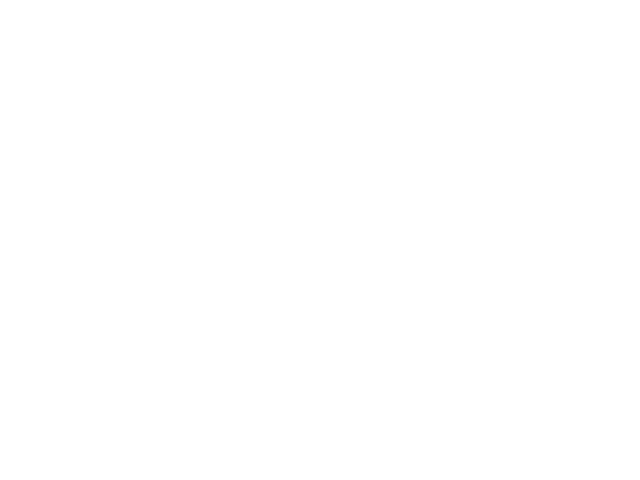

<IPython.core.display.Javascript object>


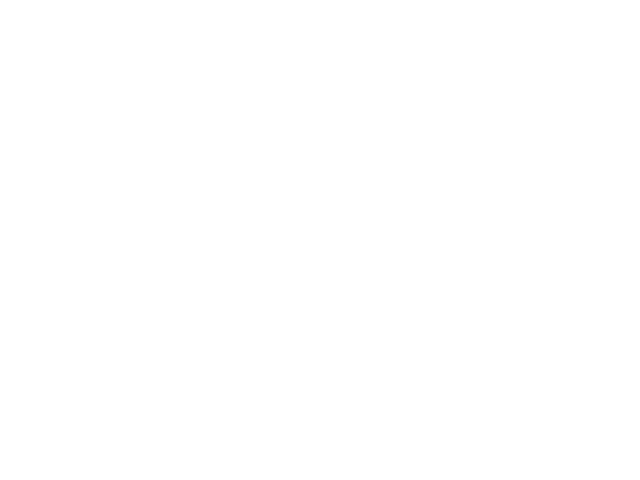

<IPython.core.display.Javascript object>


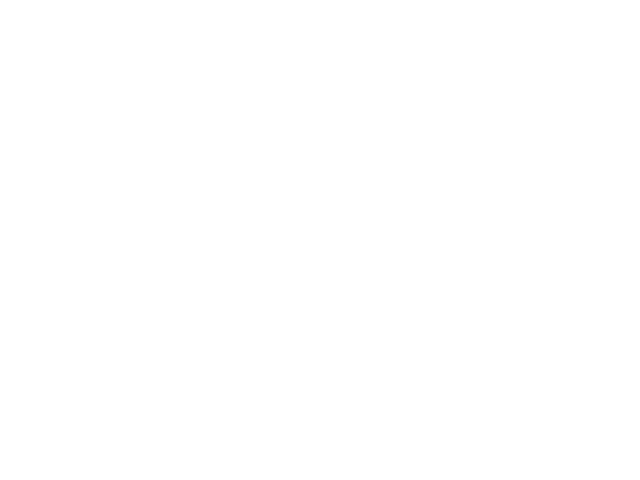

<IPython.core.display.Javascript object>


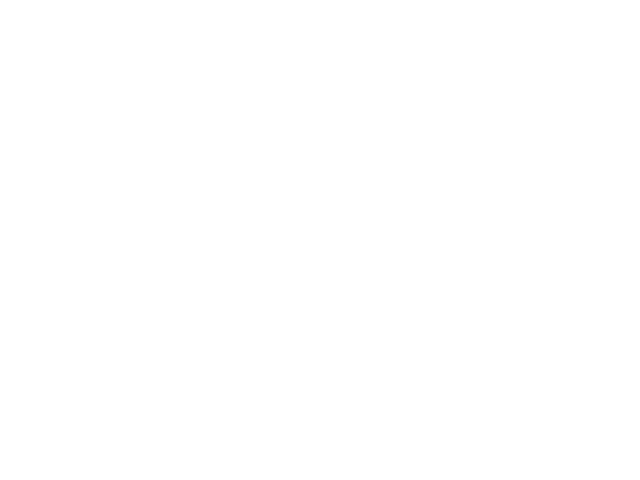

<IPython.core.display.Javascript object>


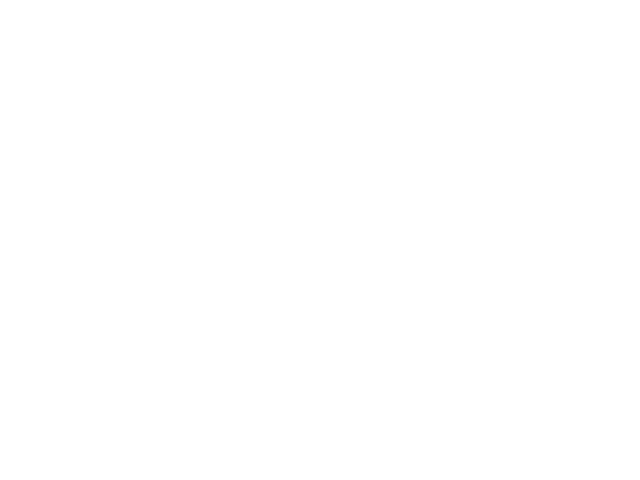

<IPython.core.display.Javascript object>


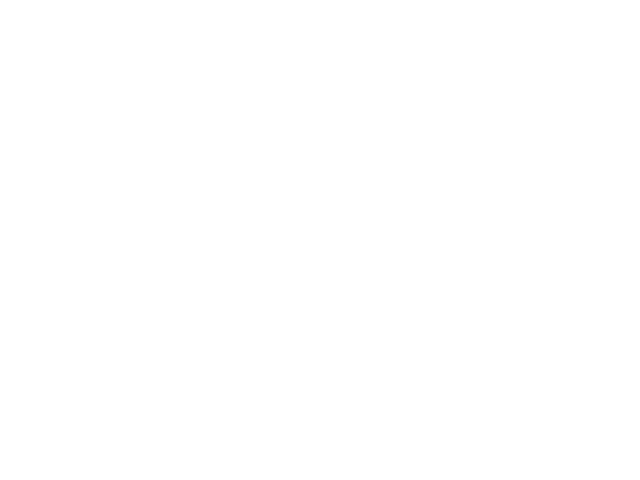

<IPython.core.display.Javascript object>


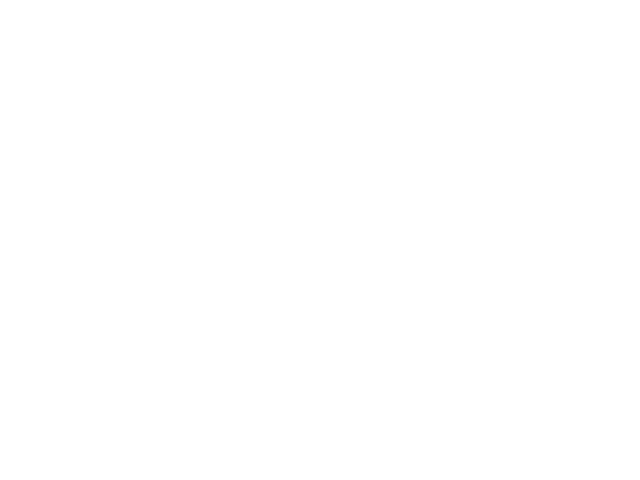

<IPython.core.display.Javascript object>


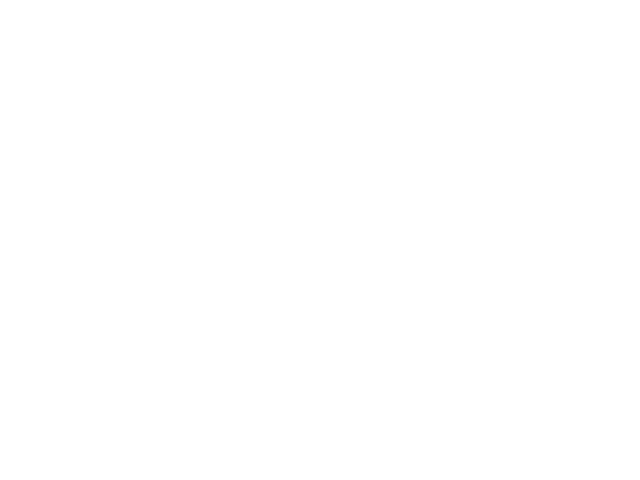

<IPython.core.display.Javascript object>


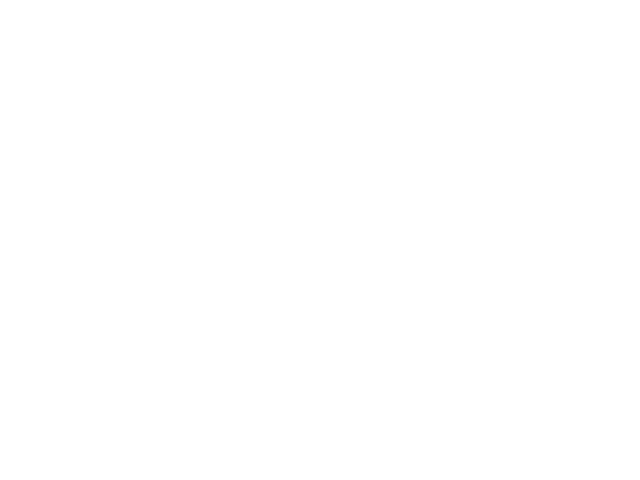

<IPython.core.display.Javascript object>


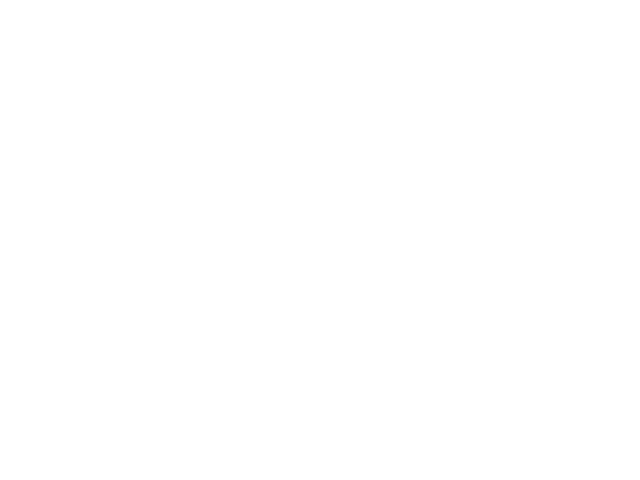

In [68]:
print_multipage(t,resp[lkat],plotZs,'fig_responsive')

In [103]:
sSC.shape

(1116, 640, 53)

In [80]:
biggest = np.logical_and(stimParamsSC[1,:]==60,stimParamsSC[4,:]==1)
bigori = stimParamsSC[0,:][biggest]

In [81]:
zbig = zsSC[:,biggest]

<IPython.core.display.Javascript object>


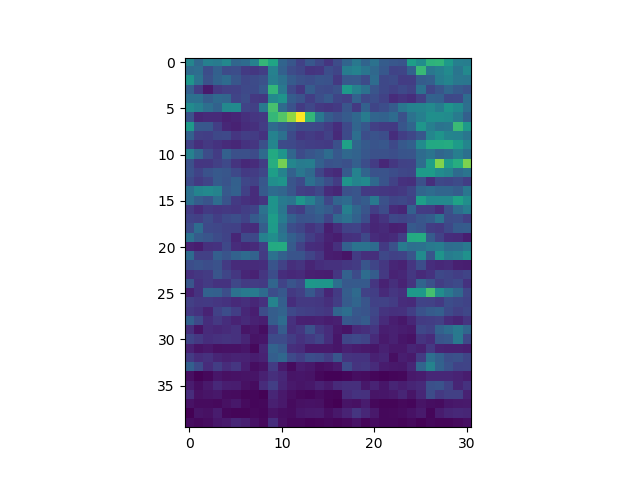

In [106]:
plt.imshow(sSC[:,biggest].mean(0))

In [114]:
orilist = np.unique(bigori)
nori = len(orilist)
# dimensions are cell X other fig/gd/etc. X orientation X rep no X time
respSC = np.zeros((zs.shape[0],nori,5,sSC.shape[-1]))
for j,angle in enumerate(orilist):
    respSC[:,j,:,:] = sSC[:,biggest][:,bigori==angle,:]

In [126]:
lkat.shape

(1116,)